In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score


import pylab

df = pd.read_csv('../devim_test_task/train.csv')
#df.dropna(axis=0)
df.drop_duplicates()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.00,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,5,35000,34,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0.0,0,0,3,0.0,0,733,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,60,NaN,0
23112,6697212,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,...,9500.0,5,0.00,1,0,5,20000,7,NaN,0
23113,6697215,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,...,0.0,0,0.00,0,0,4,35000,94,NaN,0
23114,6697264,0.0,3,52080,0,7000.0,18132,15,0.0,5783.65,...,0.0,13,0.00,0,1,3,35000,46,NaN,0


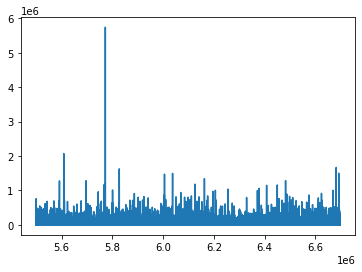

In [39]:
plt.plot(df.order_id, df.cred_sum_cc_all)

In [302]:
def diagnostic_plots(df, variable): 
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    #plt.xlim((0, 100))
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot = pylab)
    
    plt.show()
    

In [303]:
def compare_dict(a):
    temp = []
    for key, con in a.items():
        temp.append(con)
    i = 0
    for x in temp:
        if x in list_data:
            i = i + 1
    return (i)

In [304]:
def half(data):
    dict_all = data.value_counts()
    list_all = []
    list_half = []
    for key, con in dict_all.items():
        temp = [key, con]
        list_all.append(temp)
    x = 0
    for row in list_all:
        for elem in list_all:
            if (x != len_half):
                list_half.append(elem[0])
                x += 1
    return (list_half)

In [305]:
def snsplot_1(data):
    data_approved = df[[data, "approved"]]
    data_approved_1 = data_approved[data_approved["approved"] == 1]
    one = data + '1'
    print("Snsplot for approved values")
    sns_plot_1 = sns.distplot(df[one])
    fig1 = sns_plot_1.get_figure()

In [306]:
def snsplot_0(data):
    data_approved = df[[data, "approved"]]
    data_approved_0 = data_approved[data_approved["approved"] == 0]
    zero = data + '0'
    print("Snsplot for non approved values")
    sns_plot_0 = sns.distplot(df[zero])
    fig0 = sns_plot_0.get_figure()

In [307]:
def all_histograms(data):
    df.groupby('approved')[data].hist(edgecolor='None', alpha = 0.5, color= 'b', bins = 20)
    df[data].hist(by=df.approved, bins = 20)
    data_approved = df[[data, "approved"]]
    data_approved_1 = data_approved[data_approved["approved"] > 0]
    data_approved_0 = data_approved[data_approved["approved"] == 0]
    one = data + '1'
    zero = data + '0'
    df[one] = data_approved_1[data]
    df[zero] = data_approved_0[data]
    var1 = df[one].var()
    var0 = df[zero].var()
    print('Varience for approved is ', var1)
    print('Varience for not approved is ', var0)
    df[[one, zero]].plot(bins=30, kind="hist", subplots=True)
    diagnostic_plots(data_approved_1, data)
    diagnostic_plots(data_approved_0, data)
    df.groupby('approved')[data].hist(bins=30, cumulative=True)

    

In [308]:
def issuance_percentage(data):
    list_proc = []
    dict_names = df[data].value_counts()
    dict_approved = df.groupby(data).approved.sum()
    for item_approved in dict_approved.items():
        for item_name in dict_names.items():
            if item_approved[0] == item_name[0]:
                n = item_approved[1] / item_name[1]
                list_proc.append(n)
    list_name_reg = []
    for items in dict_approved.items():
        n = items[0]
        list_name_reg.append(n)
    plt.plot(list_name_reg, list_proc)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      23116 non-null  int64  
 1   cred_sum_cc_all               23116 non-null  float64
 2   mfo_inqs_count_month          23116 non-null  int64  
 3   all_closed_creds_sum_all      23116 non-null  int64  
 4   bank_inqs_count_quarter       23116 non-null  int64  
 5   cred_max_overdue_max_ly       23116 non-null  float64
 6   all_active_creds_sum_all      23116 non-null  int64  
 7   mfo_last_days_all             23116 non-null  int64  
 8   cred_sum_cc_ly                23116 non-null  float64
 9   cred_sum_debt_all_all         23116 non-null  float64
 10  all_closed_creds_sum_ly       23116 non-null  int64  
 11  mfo_cred_mean_sum_3lm         23116 non-null  float64
 12  delay_more_sum_all            23116 non-null  int64  
 13  a

In [310]:
df.shape

(23116, 25)

In [311]:
df.apply(lambda x: sum(x.isnull()),axis=0)

order_id                            0
cred_sum_cc_all                     0
mfo_inqs_count_month                0
all_closed_creds_sum_all            0
bank_inqs_count_quarter             0
cred_max_overdue_max_ly             0
all_active_creds_sum_all            0
mfo_last_days_all                   0
cred_sum_cc_ly                      0
cred_sum_debt_all_all               0
all_closed_creds_sum_ly             0
mfo_cred_mean_sum_3lm               0
delay_more_sum_all                  0
all_creds_count_all                 0
cred_day_overdue_all_sum_all        0
cred_max_overdue_max_3lm            0
mfo_closed_count_ly                 0
cred_sum_overdue_cc_all             0
count_overdue_all_3lm               0
all_creds_count_lm                  0
work_code                           0
month_income                        0
region                              0
bad                             15847
approved                            0
dtype: int64

In [312]:
count = df[["region","approved"]]
count_1 = count[count["approved"] == 1]
count_0 = count[count["approved"] == 0]
len(count)

23116

In [313]:
len(count_1)

7269

In [337]:
len(count_0)

15847

Positive examples = 7269
Negative examples = 15847
Proportion of positive to negative examples = 45.87%


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class counts')

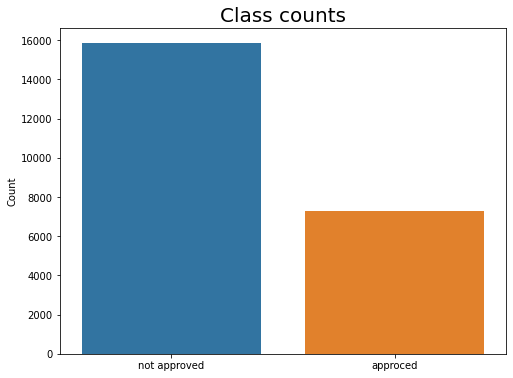

In [293]:
pos = df[df["approved"] == 1].shape[0]
neg = df[df["approved"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["approved"])
plt.xticks((0, 1), ["not approved", "approced"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", fontdict={"fontsize": 20})

In [330]:
relative_value = len(count_1) / len(count)
relative_value

0.31445751860183424

Varience for approved is  726.331628276773
Varience for not approved is  779.3305781595195


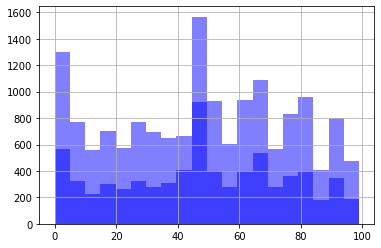

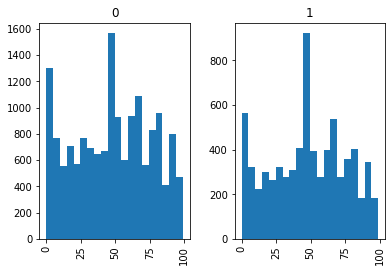

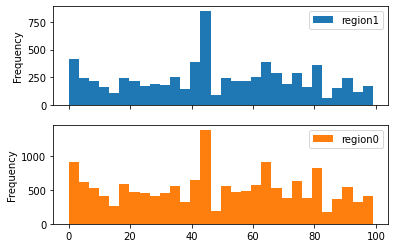

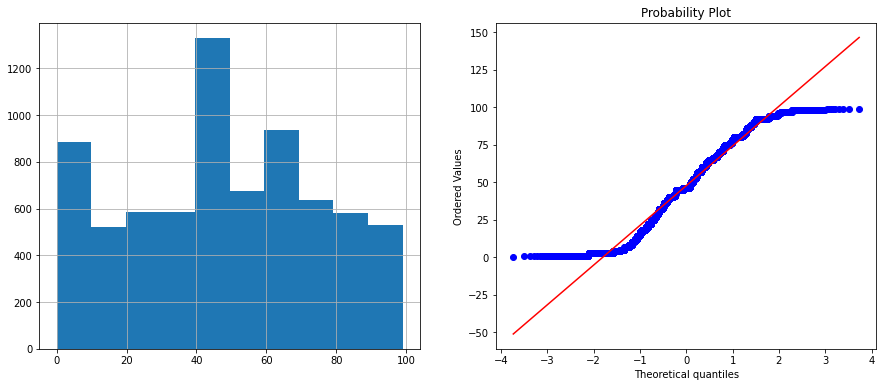

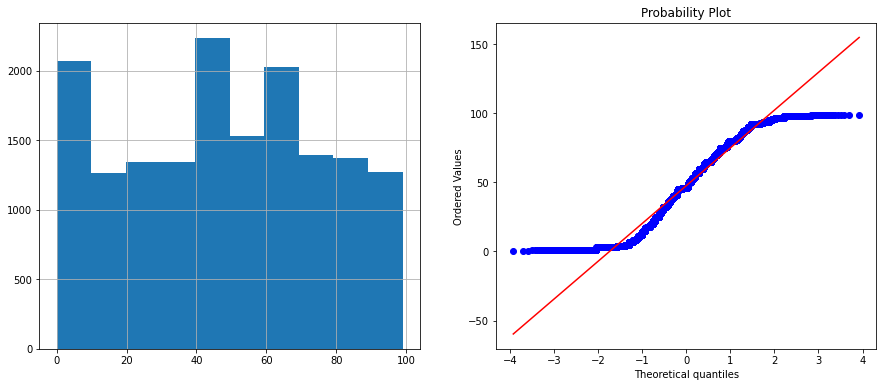

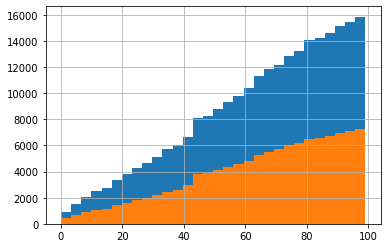

In [51]:
col = 'region'
all_histograms(col) #как видим по графикам, значимых различий в распределении не наблюдается. кажется, переменная имеет одинаковый вес. 
#тип данных - количественный, рвспределение - отличное от нормального, количество групп - 2, связанность групп: не связаны. необходимо использовать критерий Манна-Уитни

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


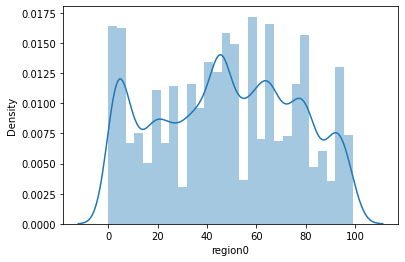

In [362]:
snsplot_0(col) #плотность распределения для региона неодобренных заявок

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


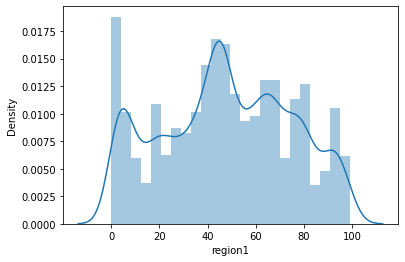

In [361]:
snsplot_1(col) #плотность распределения для региона одобренных заявок

In [327]:
df.region.describe()

count    23116.000000
mean        47.632203
std         27.615823
min          0.000000
25%         25.000000
50%         46.000000
75%         70.000000
max         99.000000
Name: region, dtype: float64

In [45]:
df.order_id[df.region.notnull()].count() #заполнены все поля с данными о регионе заявки

23116

In [374]:
len(df['region'].value_counts()) #всего регионов 

90

In [375]:
df['region'].value_counts().head(10) #регионы, из которых заявки исходят чаще всего

45    1115
46    1091
3      883
65     808
80     796
60     675
75     649
92     607
57     594
32     583
Name: region, dtype: int64

In [43]:
df['region'].value_counts().tail(10).sort_values(ascending=True)#регионы, из которых заявки исходят реже всего

59     2
48     4
0      4
43     5
77     6
62     7
55     9
26    21
44    32
99    45
Name: region, dtype: int64

In [40]:
data_region = df.groupby('approved').region.unique()
len(data_region[0]) #кол-во всех регионов заявки с отказом на кредит 

90

In [41]:
len(data_region[1]) #кол-во всех регионов заявки с одобренной заявкой на кредит

87

In [267]:
data_region = df.groupby('approved').region.unique()
data_1_region = np.array(data_region[1])
data_0_region = np.array(data_region[0])
names_0_reg = [x for x in data_0_region if x not in data_1_region]
names_0_reg #регионы заявки с неодобренным кредитом

[43, 48, 59]

In [319]:
df.groupby('region').approved.sum().sort_values(ascending=False).head() #5 регионов с максимальным количеством одобренных заявок

region
45    433
46    399
3     293
80    250
65    246
Name: approved, dtype: int64

In [223]:
df.groupby('region').approved.sum().sort_values(ascending=False).tail() #5 регионов с минимальным количеством одобренных заявок

region
62    2
0     1
59    0
48    0
43    0
Name: approved, dtype: int64

In [33]:
df.groupby('region').approved.sum() #сумма одобренных заявок по каждому региону

region
0       1
1     126
3     293
4     144
5     100
     ... 
95     15
96     20
97     68
98     73
99      9
Name: approved, Length: 90, dtype: int64

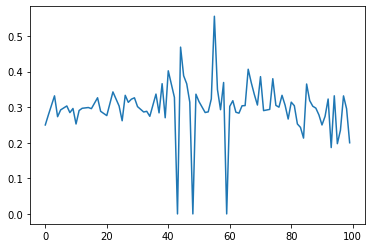

In [26]:
issuance_percentage(col) # 5 выбросов, в среднем около 30% выдачи кредита для каждого из региона заявки. параметр не играет существенной роли в скоринге

Varience for approved is  12949381084.387712
Varience for not approved is  8273388679.121042


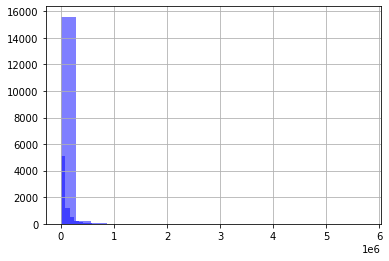

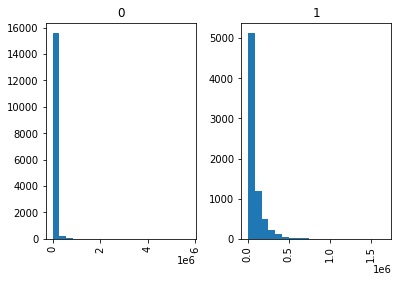

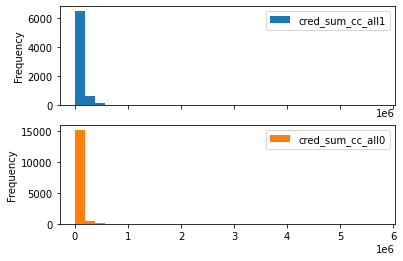

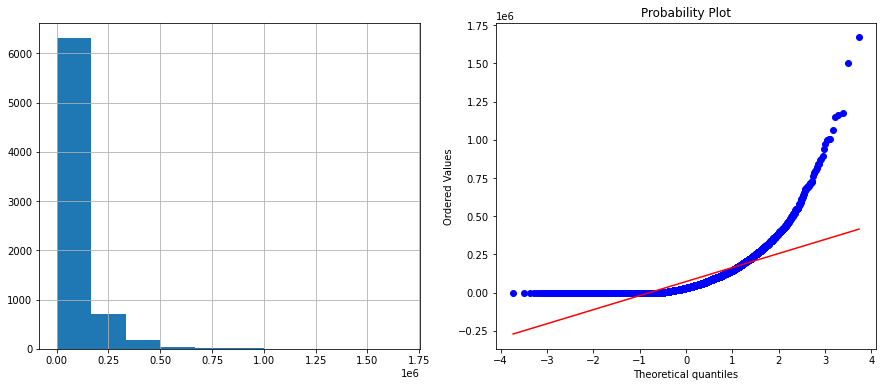

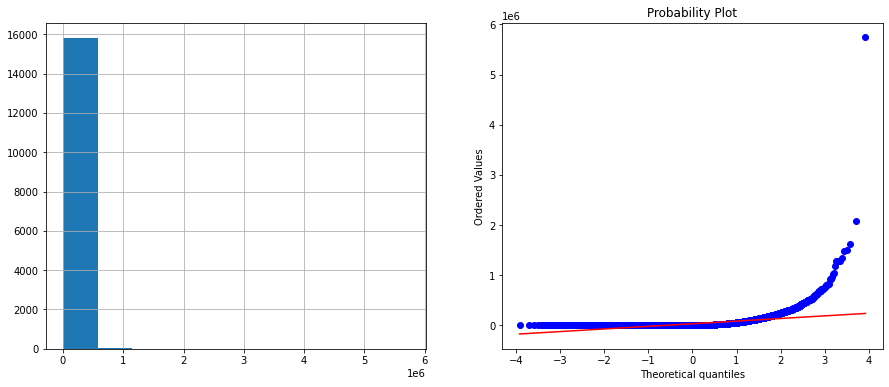

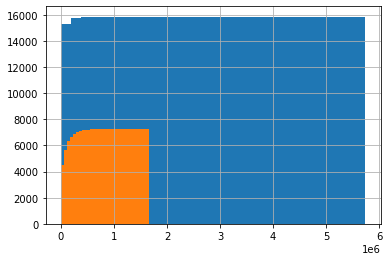

In [79]:
col = 'cred_sum_cc_all'
all_histograms(col) #сумма кредитов по кредитным картам

#как видим по графикам, сумма кредитов по кредитным картам на выборке одобренных кредитов значительно ниже чем на выборке отказанных кредитов.
#разброс значений cred_sum_cc_all относительно среднего  на выборке одобренных кредитов значительно меньше чем на выборке отказанных кредитов. 
#решение по выдаче кредитов зависит от суммы кредитов по кредитным картам.
#тип данных - количественный, рвспределение - отличное от нормального, количество групп - 2, связанность групп: не связаны. необходимо использовать критерий Манна-Уитни


In [102]:
print(df.groupby('approved').cred_sum_cc_all.agg(
    max_cred_sum_cc_all  = 'max',
    min_cred_sum_cc_all = 'min',
    ).to_markdown())

|   approved |   max_cred_sum_cc_all |   min_cred_sum_cc_all |
|-----------:|----------------------:|----------------------:|
|          0 |           5.73979e+06 |                     0 |
|          1 |           1.669e+06   |                     0 |


In [526]:
df['cred_sum_cc_all'].value_counts().head(10) #значения суммы кредита по кредитной карте встречающиеся чаще всего

0.0        9743
5000.0      859
0.1         839
15000.0     489
10000.0     449
30000.0     307
20000.0     303
50000.0     213
25000.0     174
40000.0     170
Name: cred_sum_cc_all, dtype: int64

In [14]:
len(df['cred_sum_cc_all'].value_counts())

3401

In [30]:
len_half = int(len(df['cred_sum_cc_all'].value_counts()) / 2)

In [37]:
int(df.cred_sum_cc_all.mean()) #среднее значение суммы кредитов на кредитных картах

44247

In [28]:
int(df.cred_sum_cc_all.median())

5000

In [ ]:
data = df['cred_sum_cc_all']

In [29]:
df['cred_sum_cc_all'].var()

10120681248.761553

In [52]:
list_data = half(data)

In [53]:
data_cred_sum_cc_all = df.cred_sum_cc_all < int(df.cred_sum_cc_all.mean().round())
filter_cred_sum_cc_all = df['approved'] == 0
a = df.loc[data_cred_sum_cc_all & filter_cred_sum_cc_all]
a = a.cred_sum_cc_all
print(compare_dict(a))

12481


In [41]:
data_cred_sum_cc_all = df.cred_sum_cc_all > int(df.cred_sum_cc_all.mean().round())
filter_cred_sum_cc_all = df['approved'] == 0
a = df.loc[data_cred_sum_cc_all & filter_cred_sum_cc_all]
a = a.cred_sum_cc_all
print(compare_dict(a))

2270


In [47]:
data_cred_sum_cc_all = df.cred_sum_cc_all > int(df.cred_sum_cc_all.mean().round())
filter_cred_sum_cc_all = df['approved'] == 1
a = df.loc[data_cred_sum_cc_all & filter_cred_sum_cc_all]
a = a.cred_sum_cc_all
print(compare_dict(a))

2670


In [65]:
data_cred_sum_cc_all = df.cred_sum_cc_all < int(df.cred_sum_cc_all.mean().round())
filter_cred_sum_cc_all = df['approved'] == 1
a = df.loc[data_cred_sum_cc_all & filter_cred_sum_cc_all]
a = a.cred_sum_cc_all
print(compare_dict(a))

3994


In [66]:
data_cred_sum_cc_all = df.groupby('approved').cred_sum_cc_all.value_counts() 
len(data_cred_sum_cc_all[1]) 

1697

In [67]:
len(data_cred_sum_cc_all[0])

2162

In [16]:
df.order_id[df.cred_sum_cc_all.notnull()].count() #заполнены все поля заявки с данными о сумме кредитов на кредитных картах

23116

Varience for approved is  8.905555387725093
Varience for not approved is  3.658994674247616


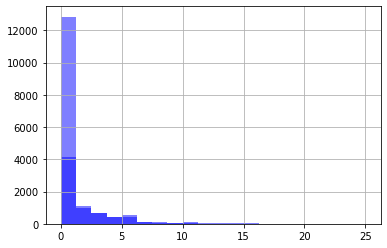

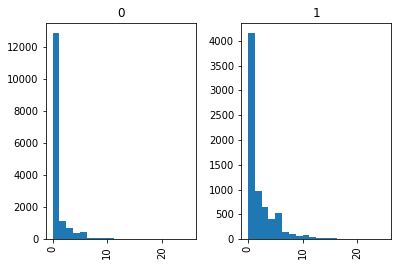

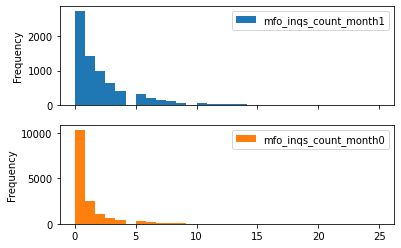

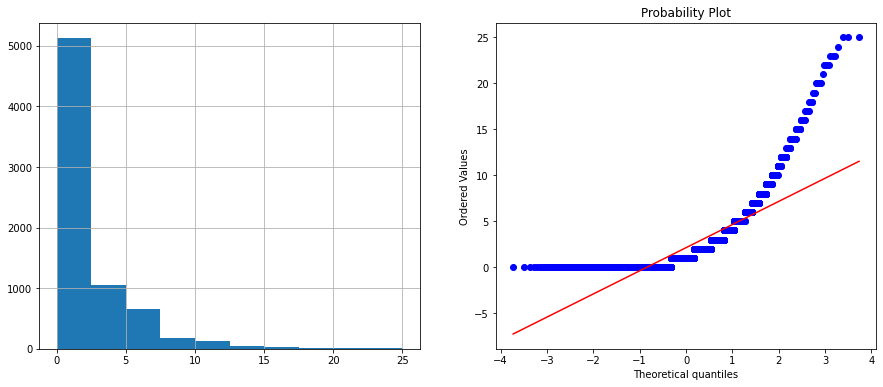

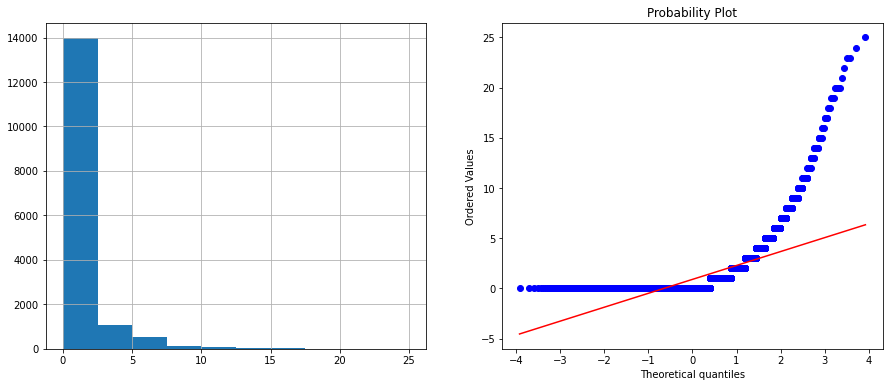

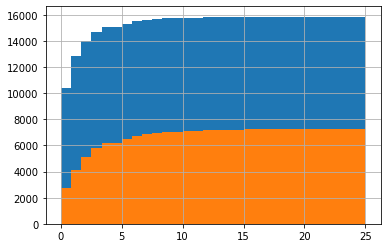

In [55]:
col = 'mfo_inqs_count_month' #количество запросов на кредиты в другие в МФО
all_histograms(col)
#как видим по графикам, количество запросов на кредиты в другие в МФО на выборке одобренных кредитов значительно ниже чем на выборке отказанных кредитов.
#разброс значений mfo_inqs_count_month относительно среднего  на выборке одобренных кредитов значительно меньше чем на выборке отказанных кредитов. 
#решение по выдаче кредитов зависит от суммы кредитов по кредитным картам. если в заявке mfo_inqs_count_month > 0, вероятность выдачи кредита увеличивается
#тип данных - количественный, рвспределение - отличное от нормального, количество групп - 2, связанность групп: не связаны. необходимо использовать критерий Манна-Уитн

In [101]:
print(df.groupby('approved').mfo_inqs_count_month.agg(
    max_mfo_inqs_count_month  = 'max',
    min_mfo_inqs_count_month = 'min',
    ).to_markdown())

|   approved |   max_mfo_inqs_count_month |   min_mfo_inqs_count_month |
|-----------:|---------------------------:|---------------------------:|
|          0 |                         25 |                          0 |
|          1 |                         25 |                          0 |


In [515]:
df['mfo_inqs_count_month'].value_counts() #количество заявок по каждому кол-ву запросов на кредиты в другие в МФО 

0     13087
1      3898
2      2110
3      1336
4       815
5       594
6       355
7       235
8       187
9       132
10       91
11       55
12       52
14       37
13       33
15       24
16       16
17       13
20       11
18        9
19        8
23        5
22        5
25        4
21        2
24        2
Name: mfo_inqs_count_month, dtype: int64

In [35]:
data_mfo_inqs_count_month = df.groupby('approved').mfo_inqs_count_month.unique()
len(data_mfo_inqs_count_month[1]) #кол-во заявок с кол-вом запросов на кредиты в другие МФО, которые были одобрены

26

In [36]:
len(data_mfo_inqs_count_month[0])

26

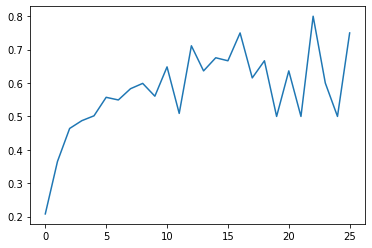

In [32]:
issuance_percentage(col) #при наличии заявок от 5 процент выдачи кредита возрастает до 50-75%. так как больше всего значений от 0 до 5, решение по выдаче кредитов зависит от суммы кредитов по кредитным картам.

In [517]:
df.groupby('mfo_inqs_count_month').approved.sum() #сумма одобренных заявок по каждому кол-ву запросов на кредиты в другие в МФО

mfo_inqs_count_month
0     2723
1     1423
2      979
3      651
4      409
5      331
6      195
7      137
8      112
9       74
10      59
11      28
12      37
13      21
14      25
15      16
16      12
17       8
18       6
19       4
20       7
21       1
22       4
23       3
24       1
25       3
Name: approved, dtype: int64

In [518]:
df.order_id[df.mfo_inqs_count_month.notnull()].count() #заполнены все поля

23116

In [519]:
df.mfo_inqs_count_month.describe()

count    23116.000000
mean         1.284262
std          2.373415
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         25.000000
Name: mfo_inqs_count_month, dtype: float64

Varience for approved is  296662069134.4916
Varience for not approved is  190902487203.4218


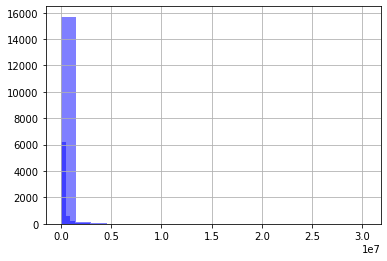

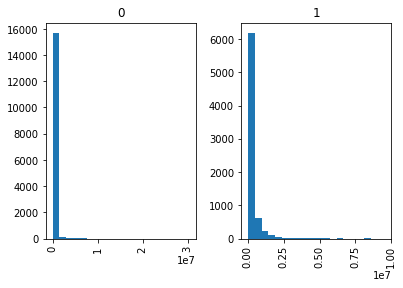

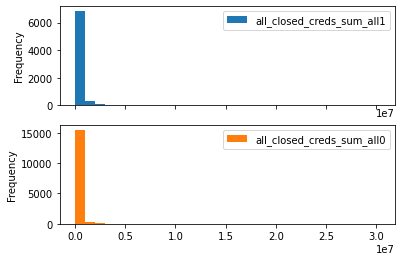

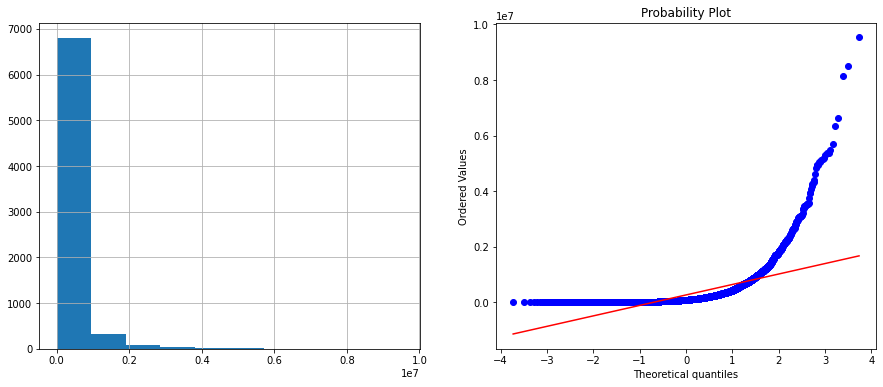

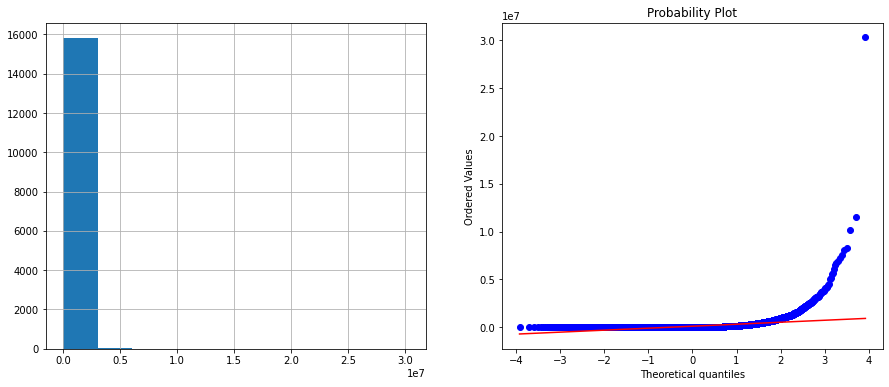

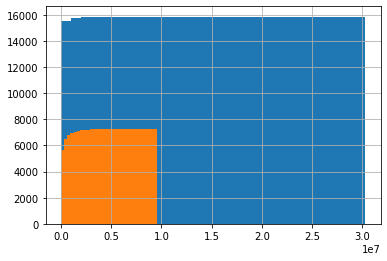

In [86]:
col = 'all_closed_creds_sum_all' #сумма закрытых кредитов
all_histograms(col)
#разброс значений относительно среднего  на выборке одобренных кредитов меньше чем на выборке отказанных кредитов, но этот параметр скорее всего не играет никакой роли
#решение по выдаче кредитов зависит от суммы кредитов по кредитным картам, если это не примерно 5% наиболее часто встречающихся значений (топ от value_counts) 
#распределение на выборке отказанных похоже на нормальное, а для отказанных - нет

In [82]:
print(df.groupby('approved').all_closed_creds_sum_all.agg(
    max_all_closed_creds_sum_all  = 'max',
    min_all_closed_creds_sum_all = 'min',
    ).to_markdown())

|   approved |   max_all_closed_creds_sum_all |   min_all_closed_creds_sum_all |
|-----------:|-------------------------------:|-------------------------------:|
|          0 |                     3.031e+07  |                              0 |
|          1 |                     9.5324e+06 |                              0 |


In [562]:
df['all_closed_creds_sum_all'].value_counts().head(10) #10 из всех наиб встречающехся суммы всех закрытых кредитов в заявках

0       4963
2000     280
3000     260
4000     214
5000     203
1000     202
6000     157
1483     108
8000     103
7000      99
Name: all_closed_creds_sum_all, dtype: int64

In [529]:
data_all_closed_creds_sum_all = df.groupby('approved').all_closed_creds_sum_all.unique()
len(data_all_closed_creds_sum_all[0])  #кол-во заявкок с суммой закрытых кредитов, которые были одобрены

8294

In [531]:
len(data_all_closed_creds_sum_all[1])  #кол-во заявкок с суммой закрытых кредитов, которые не были одобрены

5752

In [551]:
df.groupby('all_closed_creds_sum_all').approved.sum() #сумма одобренных заявок по каждой сумме закрытых кредитов

all_closed_creds_sum_all
0           430
104           0
105           0
129           0
130           0
           ... 
8520075       1
9532402       1
10224834      0
11502013      0
30309967      0
Name: approved, Length: 13583, dtype: int64

In [83]:
df.groupby('all_closed_creds_sum_all').approved.sum().sort_values(ascending=False).head(10) #5 сумм закрытых кредитов с максимальным количеством одобренных заявок

all_closed_creds_sum_all
0        430
6000      50
13000     31
4000      31
3000      28
8000      28
5000      27
10000     27
7000      23
11000     23
Name: approved, dtype: int64

In [217]:
int(df.all_closed_creds_sum_all.mean()) #среднее значение суммы закрытых кредитов

165357

In [82]:
len_half = int(len(df['all_closed_creds_sum_all'].value_counts()) / 2)
len_half

6791

In [122]:
data = df['all_closed_creds_sum_all']
list_data = half(data)
list_data

[0,
 2000,
 3000,
 4000,
 5000,
 1000,
 6000,
 1483,
 8000,
 7000,
 10000,
 11000,
 9000,
 13000,
 15000,
 12000,
 16000,
 17000,
 14000,
 20000,
 19000,
 30000,
 25000,
 18000,
 50000,
 1500,
 22000,
 3500,
 5500,
 7500,
 8500,
 2500,
 23000,
 21000,
 4500,
 11500,
 4999,
 10500,
 26000,
 16500,
 27000,
 18500,
 35000,
 32000,
 28000,
 14500,
 12500,
 9500,
 15500,
 17500,
 29000,
 70000,
 24000,
 34000,
 21500,
 33000,
 14999,
 6500,
 38000,
 100000,
 20500,
 9999,
 40000,
 13500,
 19500,
 31000,
 51000,
 36000,
 32500,
 26500,
 35500,
 48000,
 55000,
 42000,
 39000,
 23500,
 45500,
 60000,
 90000,
 39500,
 28500,
 41000,
 47000,
 200000,
 49000,
 75000,
 31500,
 45000,
 150000,
 37500,
 3900,
 22500,
 44000,
 38500,
 56500,
 37000,
 43000,
 29500,
 80000,
 43500,
 5300,
 104000,
 52500,
 5600,
 36500,
 273,
 8800,
 91000,
 67000,
 9200,
 40500,
 3483,
 12600,
 24500,
 98000,
 57000,
 8483,
 54000,
 44500,
 13900,
 9990,
 6600,
 29999,
 3200,
 30500,
 34500,
 84000,
 2600,
 33500,
 2

In [123]:
data_all_closed_creds_sum_all = df.all_closed_creds_sum_all < int(df.all_closed_creds_sum_all.mean().round())
filter_all_closed_creds_sum_all = df['approved'] == 1
a = df.loc[data_all_closed_creds_sum_all & filter_all_closed_creds_sum_all]
a = a.all_closed_creds_sum_all
print(compare_dict(a))

2372


In [124]:
data_all_closed_creds_sum_all = df.all_closed_creds_sum_all > int(df.all_closed_creds_sum_all.mean().round())
filter_all_closed_creds_sum_all = df['approved'] == 1
a = df.loc[data_all_closed_creds_sum_all & filter_all_closed_creds_sum_all]
a = a.all_closed_creds_sum_all
print(compare_dict(a))

421


In [125]:
data_all_closed_creds_sum_all = df.all_closed_creds_sum_all > int(df.all_closed_creds_sum_all.mean().round())
filter_all_closed_creds_sum_all = df['approved'] == 0
a = df.loc[data_all_closed_creds_sum_all & filter_all_closed_creds_sum_all]
a = a.all_closed_creds_sum_all
print(compare_dict(a))

153


In [126]:
data_all_closed_creds_sum_all = df.all_closed_creds_sum_all < int(df.all_closed_creds_sum_all.mean().round())
filter_all_closed_creds_sum_all = df['approved'] == 0
a = df.loc[data_all_closed_creds_sum_all & filter_all_closed_creds_sum_all]
a = a.all_closed_creds_sum_all
print(compare_dict(a))

8287


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: bank_inqs_count_quarter, dtype: object

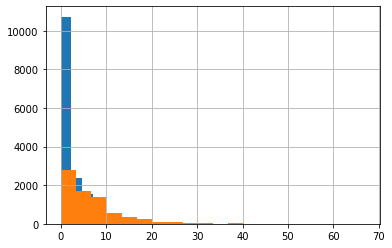

In [95]:
df.groupby('approved').bank_inqs_count_quarter.hist(bins = 20)

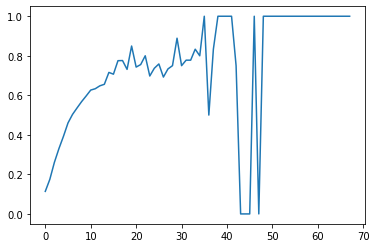

In [96]:
issuance_percentage(col) # от 0 до 15 процент выдачи кредита возрастает до 60 %, от 15 до 35 вариьируется 65-80% затем после 50 кредит одобряют всегда

Varience for approved is  40.71328535098233
Varience for not approved is  13.15175742485326


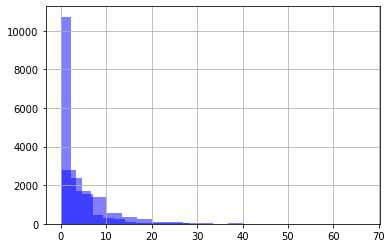

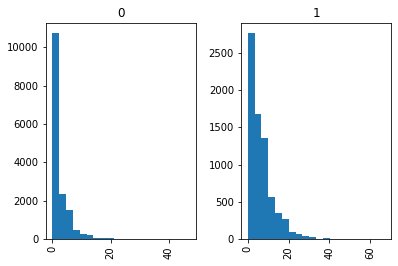

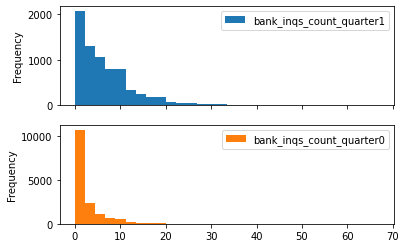

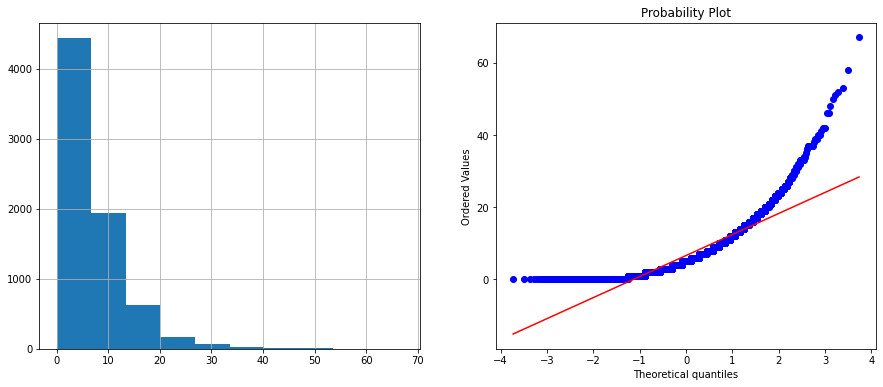

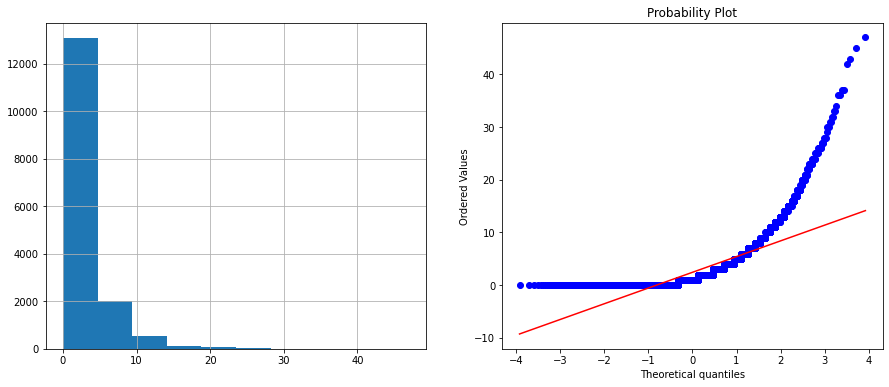

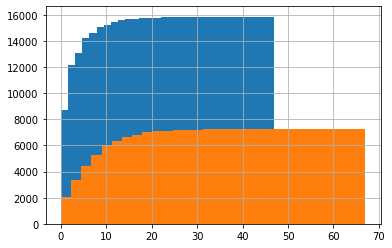

In [97]:
col = 'bank_inqs_count_quarter' #количество запросов на кредиты в банки
all_histograms(col)
#как видим по графикам, количество запросов на кредиты в банки значительно меньше на выборке одобренных кредитов чем на выборке отказанных кредитов 
#разброс значений относительно среднего  на выборке одобренных кредитов значительно меньше чем на выборке отказанных кредитов, этот параметр играет роль
#решение по выдаче кредитов зависит от количества  запросов на кредиты в банки особенно в случае максимальных значений  

In [99]:
print(df.groupby('approved').bank_inqs_count_quarter.agg(
    max_bank_inqs_count_quarter  = 'max',
    min_bank_inqs_count_quarter = 'min',
    ).to_markdown())

|   approved |   max_bank_inqs_count_quarter |   min_bank_inqs_count_quarter |
|-----------:|------------------------------:|------------------------------:|
|          0 |                            47 |                             0 |
|          1 |                            67 |                             0 |


Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


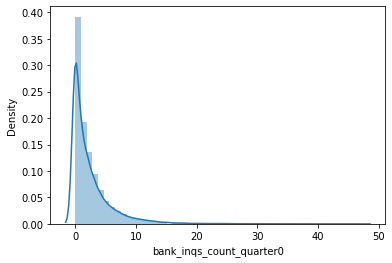

In [98]:
snsplot_0(col)

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


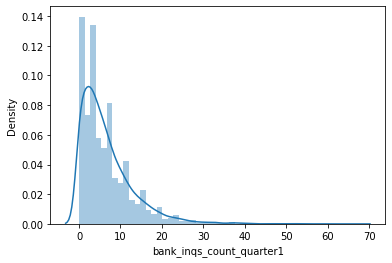

In [99]:
snsplot_1(col)

In [186]:
df['bank_inqs_count_quarter'].value_counts()

0     6586
1     3473
2     2736
3     2083
4     1574
5     1221
6      987
7      811
8      630
9      501
10     431
11     360
12     284
13     244
14     183
15     174
16     129
17     116
18      93
19      73
20      70
21      45
22      45
23      43
24      38
25      29
26      26
28      16
27      15
37      12
30      12
33      12
29       9
32       9
31       9
34       5
39       4
36       4
42       4
40       3
38       2
46       2
35       2
43       1
52       1
51       1
58       1
41       1
48       1
50       1
47       1
53       1
67       1
45       1
Name: bank_inqs_count_quarter, dtype: int64

In [569]:
df.bank_inqs_count_quarter.describe()

count    23116.000000
mean         3.760642
std          5.057107
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         67.000000
Name: bank_inqs_count_quarter, dtype: float64

In [572]:
df.order_id[df.bank_inqs_count_quarter.notnull()].count() #заполнены все поля

23116

In [581]:
data_bank_inqs_count_quarter = df.groupby('approved').bank_inqs_count_quarter.unique()
len(data_bank_inqs_count_quarter[1]) #заявки с кол-вом запросов на кредиты в банки, которые были одобрен

51

In [580]:
len(data_bank_inqs_count_quarter[0])#заявки с кол-вом запросов на кредиты в банки, которые не были одобрены

41

In [90]:
df.groupby('bank_inqs_count_quarter').approved.sum().sort_values(ascending=False) #сумма одобренных заявок по каждому кол-ву запросов на кредиты в банки

bank_inqs_count_quarter
0     751
2     713
3     688
4     618
1     608
5     562
6     497
7     435
8     358
9     299
10    270
11    228
12    184
13    160
14    131
15    123
16    100
17     90
18     68
19     62
20     52
22     36
21     34
23     30
24     28
25     22
26     18
28     12
27     11
33     10
37     10
30      9
29      8
31      7
32      7
34      4
39      4
40      3
42      3
46      2
38      2
36      2
35      2
50      1
58      1
53      1
52      1
51      1
41      1
48      1
67      1
47      0
45      0
43      0
Name: approved, dtype: int64

Varience for approved is  78796467.51097448
Varience for not approved is  1018149982.1657112


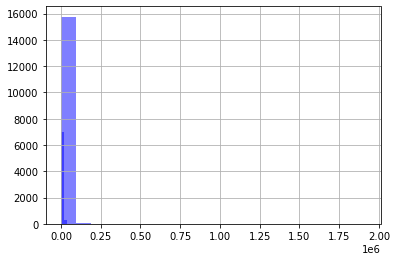

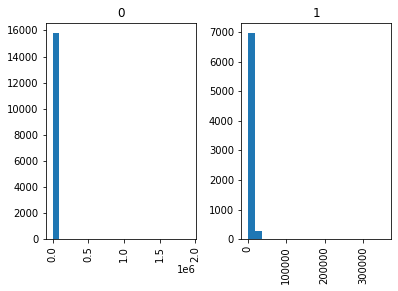

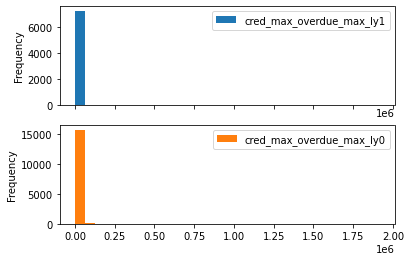

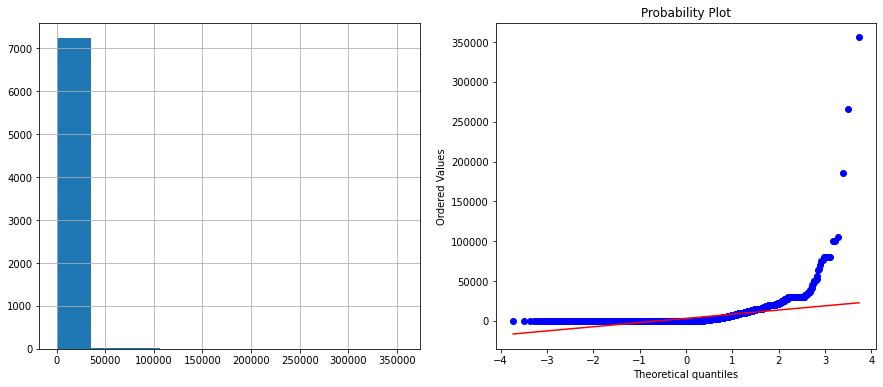

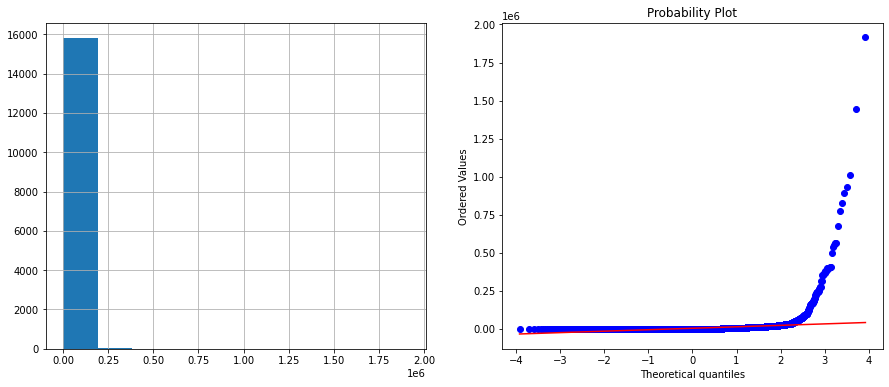

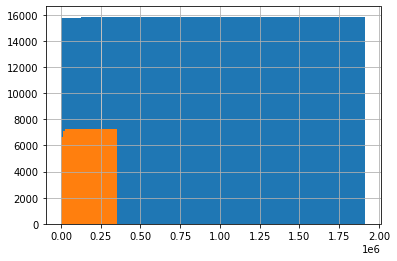

In [113]:
col = 'cred_max_overdue_max_ly' #максимальная просрочка за год
all_histograms(col)
#как видим по графикам, максимальная просрочка за год имеет вес в случае больших значений
#решение по выдаче кредитов зависит от максимальной просрочки за год
#распределение на выборке отказанных и одобренных похоже на нормальное до 2.5 теоретических квантилей

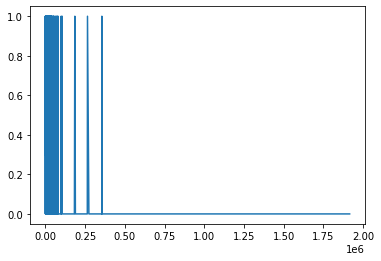

In [102]:
issuance_percentage(col) #кредит точно не одобряют  после значения 355746

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


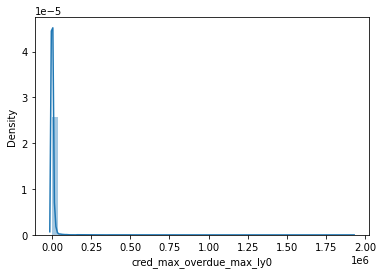

In [114]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


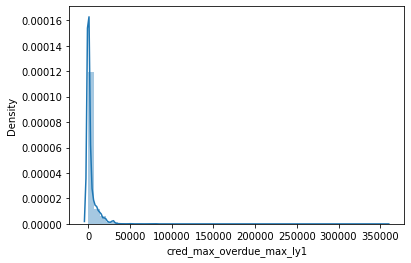

In [115]:
snsplot_1(col) 

In [62]:
print(df.cred_max_overdue_max_ly.mean()) #среднее значение 
print(df.cred_max_overdue_max_ly.median()) #медиана
print(df.cred_max_overdue_max_ly.skew()) #смещение

4070.925131078041
0.0
35.14679516924837


In [103]:
print(df.groupby('approved').cred_max_overdue_max_ly.agg(
    max_bank_inqs_count_quarter  = 'max',
    min_bank_inqs_count_quarter = 'min',
    ).to_markdown())

|   approved |   max_bank_inqs_count_quarter |   min_bank_inqs_count_quarter |
|-----------:|------------------------------:|------------------------------:|
|          0 |                   1.91458e+06 |                             0 |
|          1 |              355746           |                             0 |


In [607]:
data_cred_max_overdue_max_ly = df.groupby('approved').cred_max_overdue_max_ly.unique()
len(data_cred_max_overdue_max_ly[0]) #

2247

In [608]:
len(data_cred_max_overdue_max_ly[1])

1682

In [614]:
df.groupby('cred_max_overdue_max_ly').approved.sum() 

cred_max_overdue_max_ly
0.00          4512
1.26             0
1.80             1
3.20             1
3.52             1
              ... 
893667.95        0
933293.17        0
1013566.95       0
1441512.71       0
1914581.16       0
Name: approved, Length: 3734, dtype: int64

In [106]:
df['cred_max_overdue_max_ly'].value_counts().head(20) 

0.0        15074
5000.0       335
3000.0       309
10000.0      278
4000.0       258
6000.0       229
7000.0       209
15000.0      190
2000.0       184
8000.0       145
20000.0      107
9000.0       105
12000.0       98
30000.0       97
11000.0       94
1000.0        86
14000.0       57
13000.0       55
1483.0        50
6500.0        47
Name: cred_max_overdue_max_ly, dtype: int64

In [88]:
len_half = int(len(df['cred_max_overdue_max_ly'].value_counts()) / 2)
len_half

1867

In [89]:
data = df['cred_max_overdue_max_ly']
list_data = half(data)
list_data

[0.0,
 5000.0,
 3000.0,
 10000.0,
 4000.0,
 6000.0,
 7000.0,
 15000.0,
 2000.0,
 8000.0,
 20000.0,
 9000.0,
 12000.0,
 30000.0,
 11000.0,
 1000.0,
 14000.0,
 13000.0,
 1483.0,
 6500.0,
 7500.0,
 5500.0,
 18000.0,
 4500.0,
 2500.0,
 3500.0,
 1500.0,
 4999.0,
 16000.0,
 9999.0,
 297.01,
 12500.0,
 9500.0,
 10500.0,
 17000.0,
 5300.0,
 14500.0,
 1068.05,
 8500.0,
 20600.0,
 13500.0,
 5600.0,
 11500.0,
 23000.0,
 10900.0,
 9900.0,
 18600.0,
 305.92,
 3300.0,
 6600.0,
 12600.0,
 19000.0,
 8600.0,
 24000.0,
 25000.0,
 5900.0,
 299.98,
 302.95,
 9600.0,
 22000.0,
 10600.0,
 21200.0,
 288.1,
 17500.0,
 3600.0,
 2400.0,
 14900.0,
 21000.0,
 12300.0,
 206.29,
 15300.0,
 16500.0,
 20500.0,
 204.28,
 15500.0,
 4300.0,
 7300.0,
 22500.0,
 13200.0,
 29500.0,
 10800.0,
 26000.0,
 15600.0,
 10300.0,
 200.28,
 16200.0,
 10350.0,
 202.28,
 28000.0,
 13044.0,
 20300.0,
 5700.0,
 9300.0,
 325.75,
 3900.0,
 16600.0,
 24500.0,
 18300.0,
 13050.0,
 15350.0,
 11300.0,
 4600.0,
 19500.0,
 8100.0,
 4800.0,
 565

In [90]:
data_cred_max_overdue_max_ly = df.cred_max_overdue_max_ly < int(df.cred_max_overdue_max_ly.mean().round())
filter_cred_max_overdue_max_ly = df['approved'] == 1
a = df.loc[data_cred_max_overdue_max_ly & filter_cred_max_overdue_max_ly]
a = a.cred_max_overdue_max_ly
print(compare_dict(a))

5231


In [91]:
data_cred_max_overdue_max_ly = df.cred_max_overdue_max_ly > int(df.cred_max_overdue_max_ly.mean().round())
filter_cred_max_overdue_max_ly = df['approved'] == 1
a = df.loc[data_cred_max_overdue_max_ly & filter_cred_max_overdue_max_ly]
a = a.cred_max_overdue_max_ly
print(compare_dict(a))

1329


In [92]:
data_cred_max_overdue_max_ly = df.cred_max_overdue_max_ly < int(df.cred_max_overdue_max_ly.mean().round())
filter_cred_max_overdue_max_ly = df['approved'] == 0
a = df.loc[data_cred_max_overdue_max_ly & filter_cred_max_overdue_max_ly]
a = a.cred_max_overdue_max_ly
print(compare_dict(a))

12025


In [93]:
data_cred_max_overdue_max_ly = df.cred_max_overdue_max_ly > int(df.cred_max_overdue_max_ly.mean().round())
filter_cred_max_overdue_max_ly = df['approved'] == 0
a = df.loc[data_cred_max_overdue_max_ly & filter_cred_max_overdue_max_ly]
a = a.cred_max_overdue_max_ly
print(compare_dict(a))

2664


Varience for approved is  243789973903.4096
Varience for not approved is  102152871720.97371


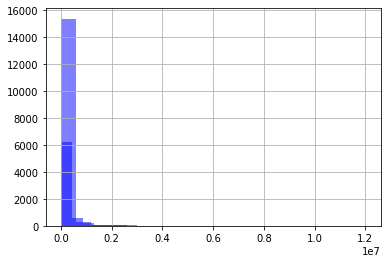

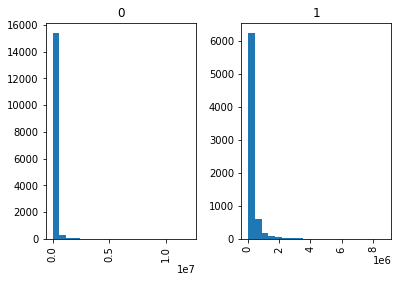

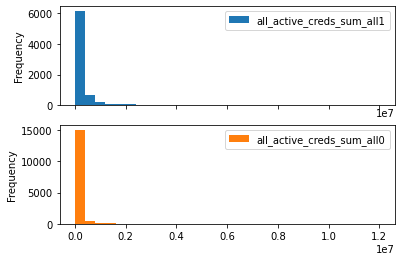

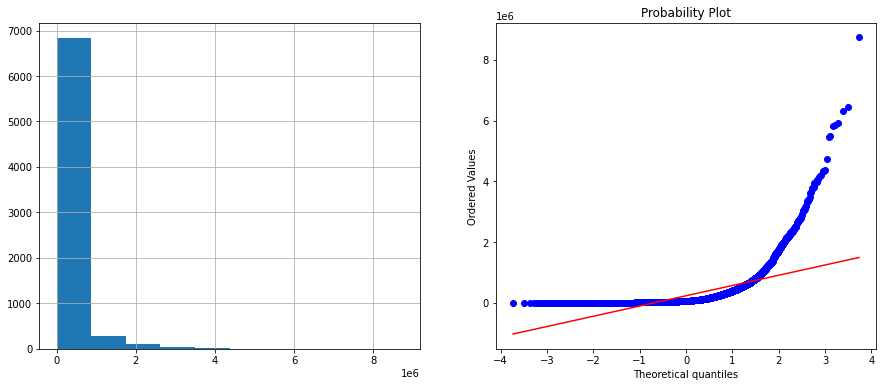

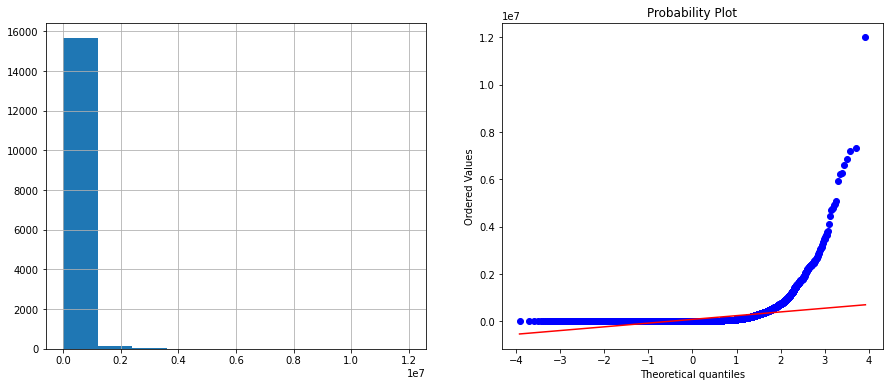

Varience for approved is  12949381084.387712
Varience for not approved is  8273388679.121042


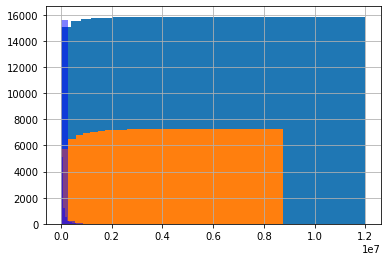

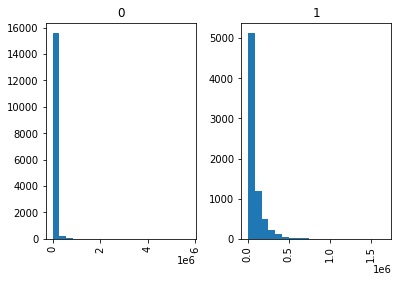

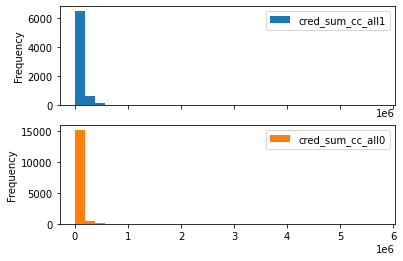

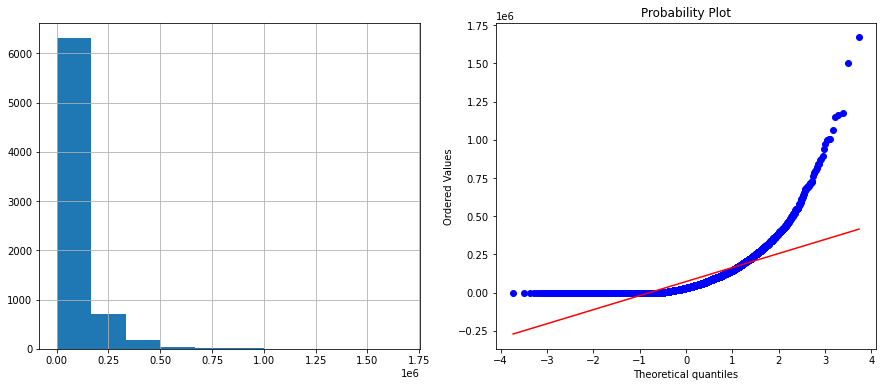

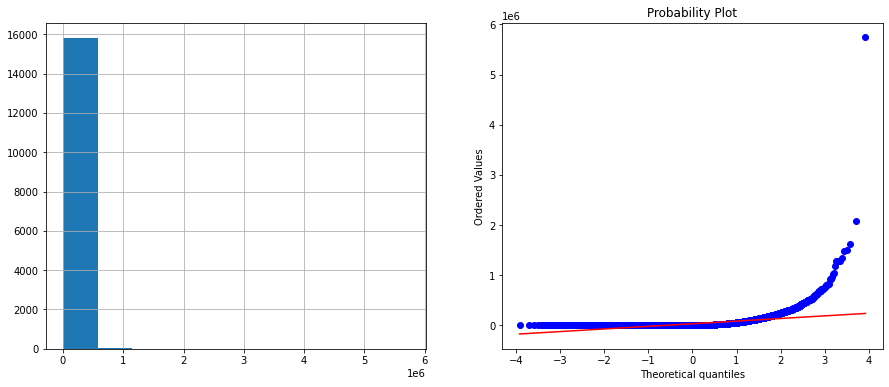

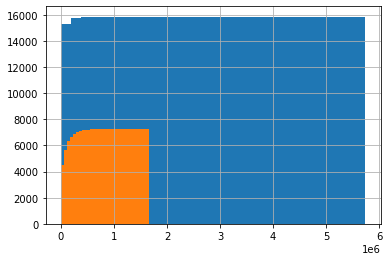

In [116]:
col = 'all_active_creds_sum_all' #денежная сумма всех активных кредитов
all_histograms(col)
col = 'cred_sum_cc_all'
all_histograms(col) 
#как видим по графикам, денежная сумма всех активных кредитов на обеих выборках может принимать практически любые значения.
#решение по выдаче кредитов зависит от суммы кредитов по кредитным картам  в случае максимальных значений, тмк как вероятность выдачи кредита увеличивается
#тип данных - количественный, рвспределение - отличное от нормального, количество групп - 2, связанность групп: не связаны. необходимо использовать критерий Манна-Уитни

In [627]:
df['all_active_creds_sum_all'].value_counts().head(10) #5 наиболее часто встречающихся 

0        4899
5000      508
3000      479
2000      398
4000      385
1000      324
1483      299
10000     251
6000      239
7000      212
Name: all_active_creds_sum_all, dtype: int64

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


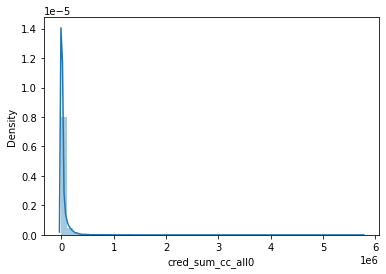

In [117]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


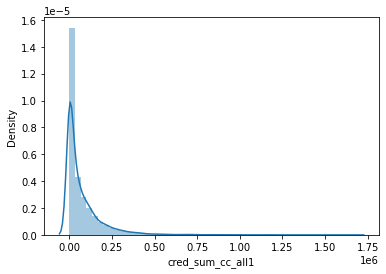

In [118]:
snsplot_1(col) #плотность распределения 

In [628]:
df.groupby('all_active_creds_sum_all').approved.sum() 

all_active_creds_sum_all
0           563
132           0
143           0
156           1
211           0
           ... 
6845060       0
7221149       0
7310508       0
8739115       1
12000000      0
Name: approved, Length: 10705, dtype: int64

In [630]:
df.all_active_creds_sum_all.mean().round()

128421.0

In [94]:
len_half = int(len(df['all_active_creds_sum_all'].value_counts()) / 2)
len_half

5352

In [95]:
data = df['all_active_creds_sum_all']
list_data = half(data)
list_data

[0,
 5000,
 3000,
 2000,
 4000,
 1000,
 1483,
 10000,
 6000,
 7000,
 8000,
 4999,
 9000,
 15000,
 12000,
 20000,
 11000,
 9999,
 13000,
 14000,
 6500,
 7500,
 16000,
 3500,
 11988,
 17000,
 4500,
 1500,
 5500,
 30000,
 18000,
 2500,
 50000,
 9500,
 25000,
 10500,
 19000,
 24000,
 8500,
 21000,
 11500,
 22000,
 12500,
 40000,
 26000,
 9988,
 23000,
 31000,
 5990,
 14500,
 15500,
 1482,
 3990,
 13500,
 5483,
 100000,
 28000,
 4483,
 29000,
 3483,
 35000,
 18500,
 16500,
 3900,
 21500,
 5300,
 31500,
 20500,
 24500,
 7483,
 14999,
 5900,
 10900,
 5250,
 8483,
 17500,
 11483,
 32000,
 25500,
 6988,
 41000,
 30500,
 27000,
 9990,
 34000,
 19500,
 150000,
 26500,
 2400,
 29500,
 10483,
 52000,
 60000,
 6483,
 37500,
 200000,
 27500,
 5400,
 46000,
 56000,
 2200,
 39000,
 2700,
 7999,
 10850,
 38000,
 12999,
 5999,
 8300,
 33000,
 9900,
 75000,
 45000,
 12990,
 6900,
 6250,
 22500,
 65000,
 43000,
 14995,
 36000,
 12988,
 29999,
 10999,
 15999,
 33500,
 16988,
 19900,
 37000,
 4499,
 44000,
 

In [96]:
data_all_active_creds_sum_all = df.all_active_creds_sum_all < int(df.all_active_creds_sum_all.mean().round())
filter_all_active_creds_sum_all = df['approved'] == 1
a = df.loc[data_all_active_creds_sum_all & filter_all_active_creds_sum_all]
a = a.all_active_creds_sum_all
print(compare_dict(a))

3773


In [97]:
data_all_active_creds_sum_all = df.all_active_creds_sum_all > int(df.all_active_creds_sum_all.mean().round())
filter_all_active_creds_sum_all = df['approved'] == 1
a = df.loc[data_all_active_creds_sum_all & filter_all_active_creds_sum_all]
a = a.all_active_creds_sum_all
print(compare_dict(a))

1355


In [99]:
data_all_active_creds_sum_all = df.all_active_creds_sum_all < int(df.all_active_creds_sum_all.mean().round())
filter_all_active_creds_sum_all = df['approved'] == 0
a = df.loc[data_all_active_creds_sum_all & filter_all_active_creds_sum_all]
a = a.all_active_creds_sum_all
print(compare_dict(a))

11764


In [100]:
data_all_active_creds_sum_all = df.all_active_creds_sum_all > int(df.all_active_creds_sum_all.mean().round())
filter_all_active_creds_sum_all = df['approved'] == 0
a = df.loc[data_all_active_creds_sum_all & filter_all_active_creds_sum_all]
a = a.all_active_creds_sum_all
print(compare_dict(a))

871


Varience for approved is  11050247.338150572
Varience for not approved is  19892781.094342165


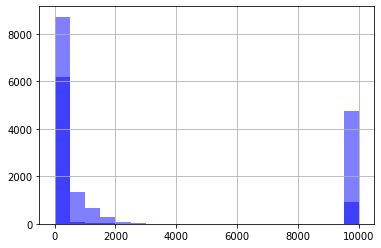

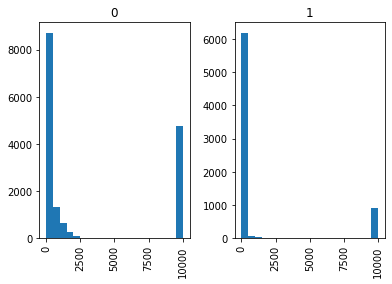

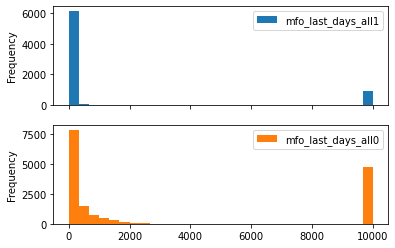

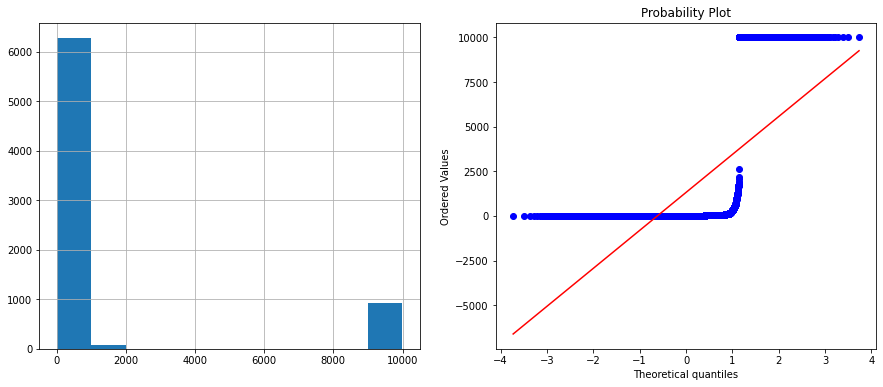

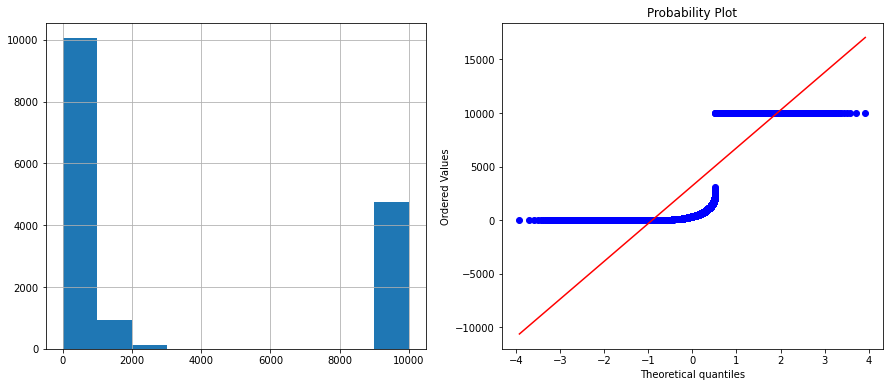

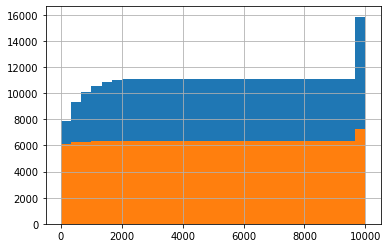

In [119]:
col = 'mfo_last_days_all' #Количество дней с последнего займа в МФО
all_histograms(col) #как видим по графикам, при маленьких значениях распределение не сильно отличается, до значения 2000 процент выдачи составлят 0-50%, от 2500- повышается от 0 до 17% по мере приближения к максимальному значению 9999
#решение по выдаче кредитов зависит от данной переменной

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


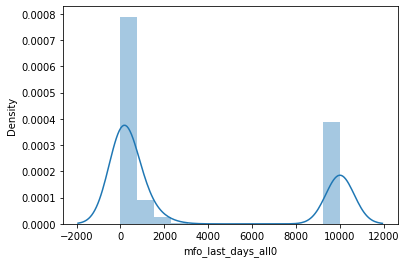

In [129]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


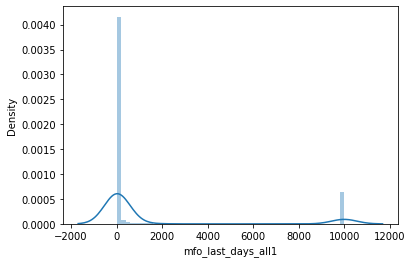

In [130]:
snsplot_1(col) 

In [123]:
df['mfo_last_days_all'].value_counts().head(20) 

9999    5681
5        600
7        565
4        563
6        537
8        529
2        488
9        458
3        453
10       424
11       371
12       360
13       330
1        314
14       313
16       271
15       270
18       236
20       225
17       220
Name: mfo_last_days_all, dtype: int64

In [95]:
print(df.groupby('approved').mfo_last_days_all.agg(
    max_mfo_last_days_all  = 'max',
    min_mfo_last_days_all = 'min',
    ).to_markdown())

|   approved |   max_mfo_last_days_all |   min_mfo_last_days_all |
|-----------:|------------------------:|------------------------:|
|          0 |                    9999 |                       0 |
|          1 |                    9999 |                       0 |


In [642]:
len(df['mfo_last_days_all'].value_counts()) #всего 

1639

In [132]:
df.mfo_last_days_all.mean().round() #округленное среднее значение

2616.0

In [649]:
data_mfo_last_days_all = df.groupby('approved').mfo_last_days_all.unique()
len(data_mfo_last_days_all[0])  #неодобренных

1616

In [650]:
data_mfo_last_days_all = df.groupby('approved').mfo_last_days_all.unique()
len(data_mfo_last_days_all[1]) #одобренных

430

In [125]:
df.groupby('mfo_last_days_all').approved.sum().head(20) 

mfo_last_days_all
0       1
1     136
2     290
3     293
4     340
5     391
6     336
7     321
8     332
9     282
10    251
11    221
12    203
13    196
14    163
15    140
16    148
17    105
18    127
19    105
Name: approved, dtype: int64

In [128]:
df.groupby('mfo_last_days_all').approved.sum().tail(10) 

mfo_last_days_all
2699      0
2707      0
2775      0
2785      0
2792      0
2826      0
2830      0
2884      0
3105      0
9999    928
Name: approved, dtype: int64

In [101]:
len_half = int(len(df['mfo_last_days_all'].value_counts()) / 2)
len_half

819

In [104]:
data = df['mfo_last_days_all']
list_data = half(data)
list_data

[9999,
 5,
 7,
 4,
 6,
 8,
 2,
 9,
 3,
 10,
 11,
 12,
 13,
 1,
 14,
 16,
 15,
 18,
 20,
 17,
 19,
 21,
 23,
 22,
 28,
 24,
 25,
 26,
 29,
 30,
 27,
 34,
 33,
 31,
 32,
 38,
 36,
 35,
 40,
 41,
 42,
 37,
 39,
 43,
 45,
 48,
 44,
 47,
 54,
 46,
 52,
 49,
 62,
 56,
 50,
 51,
 55,
 61,
 70,
 58,
 64,
 66,
 60,
 57,
 72,
 78,
 87,
 53,
 82,
 75,
 63,
 71,
 67,
 84,
 79,
 85,
 68,
 65,
 59,
 69,
 76,
 80,
 103,
 74,
 95,
 122,
 94,
 132,
 90,
 111,
 86,
 99,
 101,
 83,
 150,
 73,
 77,
 106,
 92,
 116,
 100,
 81,
 110,
 119,
 93,
 114,
 98,
 102,
 89,
 104,
 123,
 113,
 109,
 128,
 127,
 164,
 135,
 91,
 107,
 118,
 108,
 120,
 134,
 235,
 159,
 155,
 131,
 121,
 125,
 115,
 97,
 96,
 88,
 173,
 130,
 117,
 161,
 254,
 195,
 151,
 139,
 112,
 105,
 266,
 146,
 317,
 153,
 449,
 213,
 249,
 133,
 152,
 142,
 124,
 143,
 126,
 190,
 370,
 129,
 210,
 515,
 178,
 174,
 290,
 175,
 380,
 165,
 549,
 169,
 176,
 305,
 417,
 156,
 460,
 179,
 148,
 221,
 335,
 342,
 303,
 334,
 426,
 265,
 205,
 22

approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cred_sum_cc_ly, dtype: object

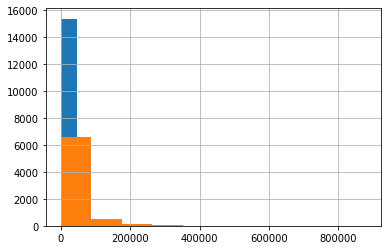

In [134]:
df.groupby('approved').cred_sum_cc_ly.hist() #Сумма лимитов кредитных карт, оформленных за последний год

Varience for approved is  3041900786.6841216
Varience for not approved is  496529110.79105705


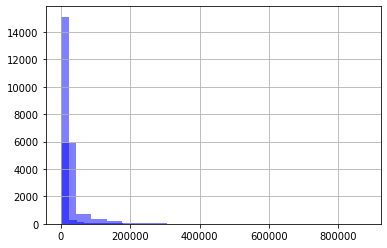

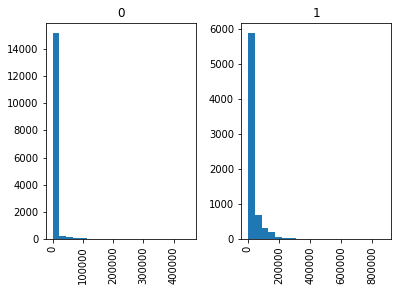

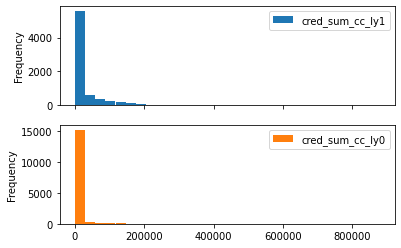

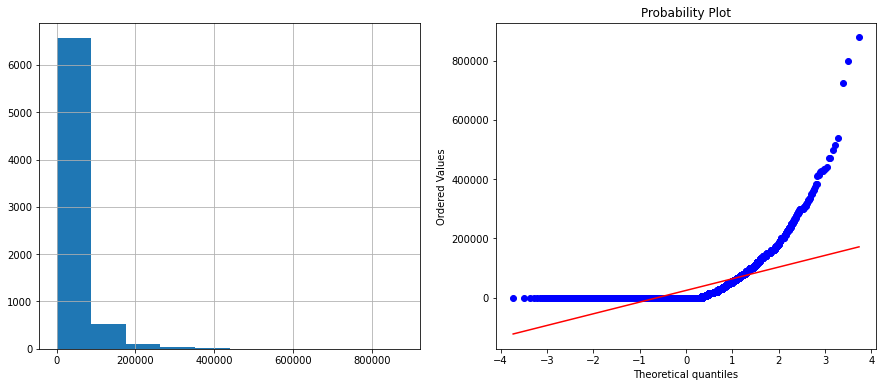

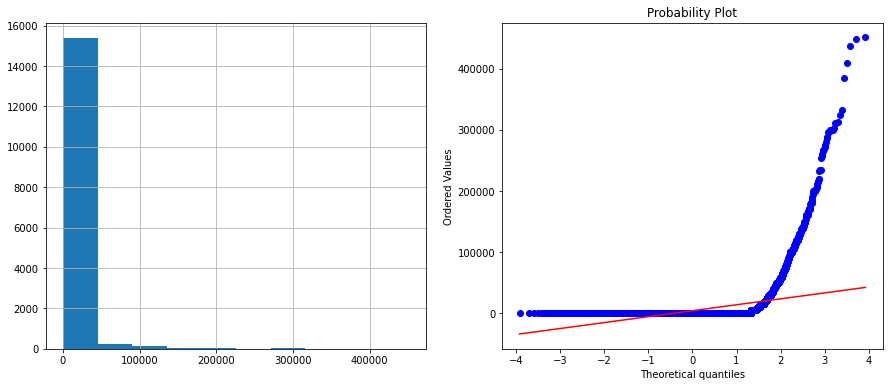

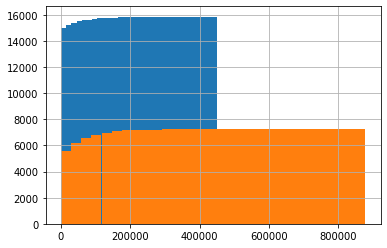

In [135]:
col = 'cred_sum_cc_ly' #Сумма лимитов кредитных карт, оформленных за последний год
all_histograms(col) 
#после значения 451000 вероятность выдачи 100%
#решение по выдаче кредитов зависит от суммы кредитов по кредитным картам  в случае значений, больше чем среднее так как вероятность выдачи кредита увеличивается

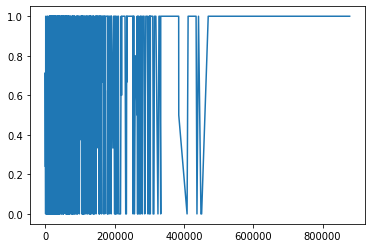

In [136]:
issuance_percentage(col)

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


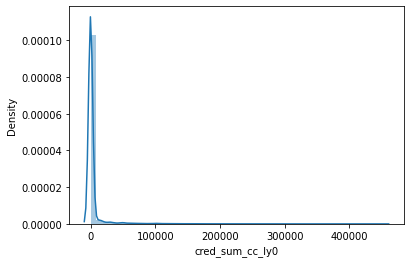

In [137]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


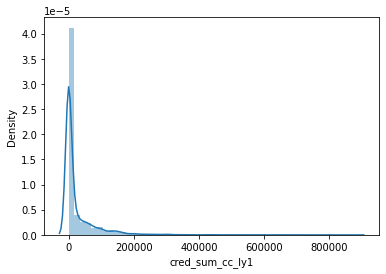

In [138]:
snsplot_1(col) #плотность распределения 

In [163]:
print(df.groupby('approved').cred_sum_cc_ly.agg(
    max_cred_sum_cc_ly  = 'max',
    min_cred_sum_cc_ly = 'min',
    ).to_markdown())

|   approved |   max_cred_sum_cc_ly |   min_cred_sum_cc_ly |
|-----------:|---------------------:|---------------------:|
|          0 |               451000 |                    0 |
|          1 |               878000 |                    0 |


In [230]:
int(df.cred_sum_cc_ly.mean().round()) #округленное среднее значение

10672

In [19]:
data_cred_sum_cc_ly_01 = df.groupby('approved').cred_sum_cc_ly.value_counts() 
data_cred_sum_cc_ly_01[1].head(10) #встречаются чаще всего среди одобренных

cred_sum_cc_ly
0.0        4322
0.1         255
15000.0     187
5000.0      173
20000.0     119
10000.0     103
30000.0      97
50000.0      88
60000.0      63
75000.0      61
Name: cred_sum_cc_ly, dtype: int64

In [30]:
data_cred_sum_cc_ly_01[0].head(10) #встречаются чаще всего среди отказанных 

cred_sum_cc_ly
0.0        13570
0.1          785
5000.0       258
15000.0      128
10000.0       61
20000.0       52
30000.0       49
50000.0       41
7000.0        25
1.0           23
Name: cred_sum_cc_ly, dtype: int64

In [118]:
len_half = int(len(df['cred_sum_cc_ly'].value_counts()) / 2)
len_half

330

In [120]:
data = df['cred_sum_cc_ly']
list_data = half(data)
list_data

[0.0,
 0.1,
 5000.0,
 15000.0,
 20000.0,
 10000.0,
 30000.0,
 50000.0,
 60000.0,
 45000.0,
 75000.0,
 25000.0,
 35000.0,
 100000.0,
 55000.0,
 65000.0,
 90000.0,
 70000.0,
 40000.0,
 1.0,
 6000.0,
 140000.0,
 80000.0,
 7000.0,
 8000.0,
 120000.0,
 160000.0,
 105000.0,
 150000.0,
 135000.0,
 110000.0,
 5000.1,
 11000.0,
 12000.0,
 95000.0,
 85000.0,
 14000.0,
 33000.0,
 17000.0,
 130000.0,
 13000.0,
 24000.0,
 36000.0,
 200000.0,
 22000.0,
 28000.0,
 27000.0,
 125000.0,
 16000.0,
 21000.0,
 115000.0,
 26000.0,
 32000.0,
 29000.0,
 48000.0,
 9000.0,
 15000.1,
 41000.0,
 31000.0,
 34000.0,
 51000.0,
 44000.0,
 18000.0,
 23000.0,
 46000.0,
 42000.0,
 170000.0,
 19000.0,
 49000.0,
 58000.0,
 10000.1,
 84000.0,
 43000.0,
 175000.0,
 38000.0,
 37000.0,
 47000.0,
 67000.0,
 20000.1,
 54000.0,
 87000.0,
 68000.0,
 100000.1,
 300000.0,
 39000.0,
 57000.0,
 74000.0,
 66000.0,
 180000.0,
 0.2,
 81000.0,
 155000.0,
 1.1,
 59000.0,
 52000.0,
 60000.1,
 40000.1,
 210000.0,
 91000.0,
 235000.0,
 73000

In [121]:
data_cred_sum_cc_ly = df.cred_sum_cc_ly < int(df.cred_sum_cc_ly.mean().round())
filter_cred_sum_cc_ly = df['approved'] == 0
a = df.loc[data_cred_sum_cc_ly & filter_cred_sum_cc_ly]
a = a.cred_sum_cc_ly
print(compare_dict(a))

14803


In [122]:
data_cred_sum_cc_ly = df.cred_sum_cc_ly < int(df.cred_sum_cc_ly.mean().round())
filter_cred_sum_cc_ly = df['approved'] == 1
a = df.loc[data_cred_sum_cc_ly & filter_cred_sum_cc_ly]
a = a.cred_sum_cc_ly
print(compare_dict(a))

4981


In [123]:
data_cred_sum_cc_ly = df.cred_sum_cc_ly > int(df.cred_sum_cc_ly.mean().round())
filter_cred_sum_cc_ly = df['approved'] == 0
a = df.loc[data_cred_sum_cc_ly & filter_cred_sum_cc_ly]
a = a.cred_sum_cc_ly
print(compare_dict(a))

890


In [124]:
data_cred_sum_cc_ly = df.cred_sum_cc_ly > int(df.cred_sum_cc_ly.mean().round())
filter_cred_sum_cc_ly = df['approved'] == 1
a = df.loc[data_cred_sum_cc_ly & filter_cred_sum_cc_ly]
a = a.cred_sum_cc_ly
print(compare_dict(a))

2112


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cred_sum_debt_all_all, dtype: object

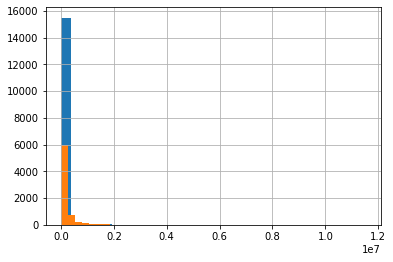

In [155]:
df.groupby('approved').cred_sum_debt_all_all.hist(bins=30)

Varience for approved is  180581046015.60373
Varience for not approved is  46323991705.25331


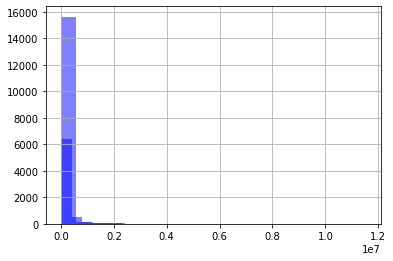

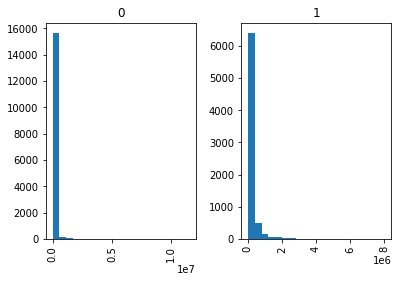

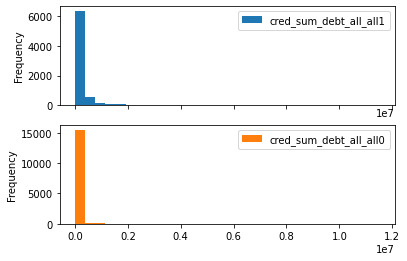

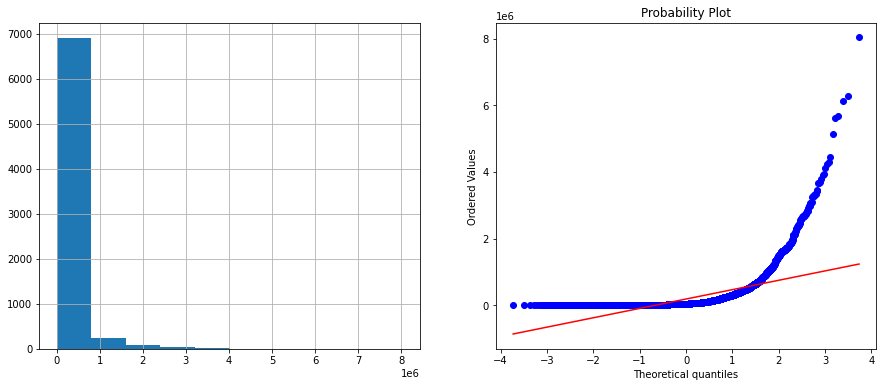

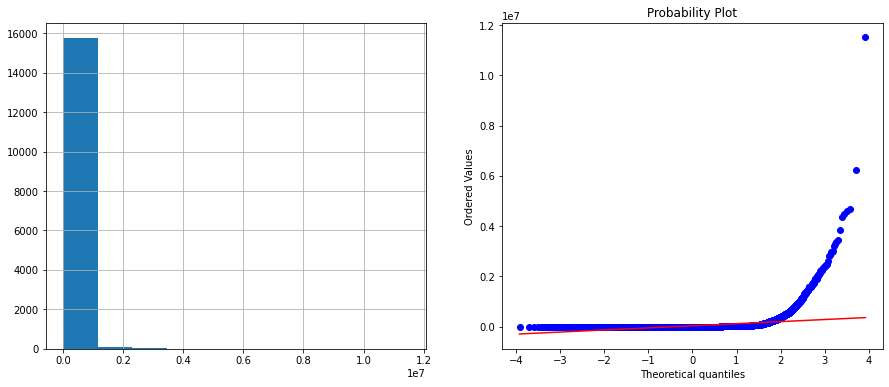

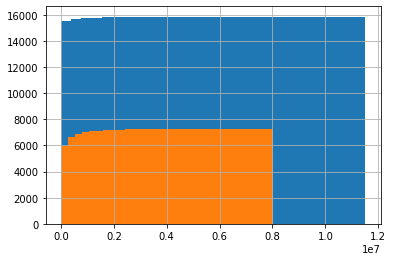

In [139]:
col = 'cred_sum_debt_all_all' #Сумма задолженности по всем кредитам
all_histograms(col)
#как видим по графикам, распределение переменной на графике отказанных кредитов похоже на нормальное до 2 теоретических квантилей
#решение по выдаче кредитов зависит от суммы задолженности по всем кредитам в случае средних и максимальных значений, при максимальных вероятность выдачи кредита уменьшается, но в случае средних значений увеличивается


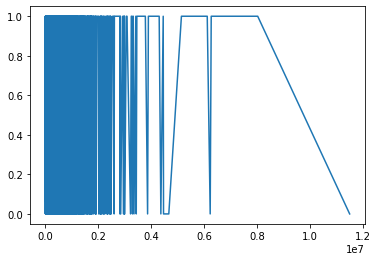

In [140]:
issuance_percentage(col)

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


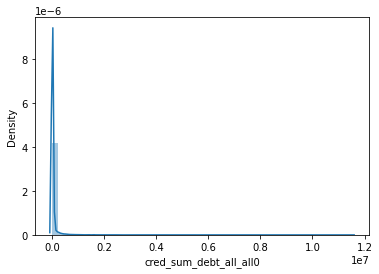

In [142]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


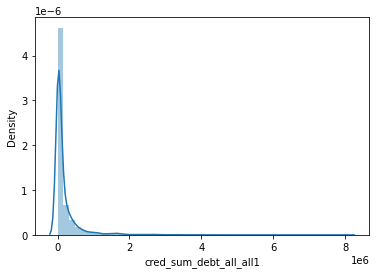

In [143]:
snsplot_1(col) #плотность распределения 

In [125]:
print(df.groupby('approved').cred_sum_debt_all_all.agg(
    max_cred_sum_debt_all_all  = 'max',
    min_cred_sum_debt_all_all = 'min',
    ).to_markdown())

|   approved |   max_cred_sum_debt_all_all |   min_cred_sum_debt_all_all |
|-----------:|----------------------------:|----------------------------:|
|          0 |                 1.15082e+07 |                           0 |
|          1 |                 8.03153e+06 |                           0 |


In [32]:
df['cred_sum_debt_all_all'].value_counts().head(10) #встречаюся чаще всего 

0.0        9167
3000.0      367
5000.0      322
2000.0      298
4000.0      276
1483.0      200
10000.0     177
6000.0      152
7000.0      148
8000.0      136
Name: cred_sum_debt_all_all, dtype: int64

In [126]:
data_cred_sum_debt_all_all = df.groupby('approved').cred_sum_debt_all_all.value_counts() 
data_cred_sum_debt_all_all[1].head(10) #встречаются чаще всего среди одобренных

cred_sum_debt_all_all
0.0        588
10000.0     82
5000.0      74
6000.0      65
3000.0      57
8000.0      55
7000.0      54
4000.0      53
9000.0      40
15000.0     40
Name: cred_sum_debt_all_all, dtype: int64

In [127]:
data_cred_sum_debt_all_all[0].head(10) #встречаются чаще всего среди отказанных 

cred_sum_debt_all_all
0.0        8579
3000.0      310
2000.0      269
5000.0      248
4000.0      223
1483.0      193
1000.0      121
10000.0      95
7000.0       94
6000.0       87
Name: cred_sum_debt_all_all, dtype: int64

In [130]:
len_half = int(len(df['cred_sum_debt_all_all'].value_counts()) / 2)
len_half

4834

In [132]:
data = df['cred_sum_debt_all_all']
list_data = half(data)
list_data

[0.0,
 3000.0,
 5000.0,
 2000.0,
 4000.0,
 1483.0,
 10000.0,
 6000.0,
 7000.0,
 8000.0,
 1000.0,
 15000.0,
 9000.0,
 11000.0,
 12000.0,
 6500.0,
 14000.0,
 20000.0,
 7500.0,
 13000.0,
 16000.0,
 3500.0,
 17000.0,
 10500.0,
 2500.0,
 1500.0,
 9500.0,
 4500.0,
 5500.0,
 18000.0,
 19000.0,
 8500.0,
 12500.0,
 11500.0,
 13500.0,
 9999.0,
 30000.0,
 11988.0,
 3990.0,
 24000.0,
 14500.0,
 22000.0,
 26000.0,
 15500.0,
 25000.0,
 21000.0,
 1482.0,
 4483.0,
 23000.0,
 9988.0,
 16500.0,
 4999.0,
 3900.0,
 9900.0,
 414.95,
 1185.99,
 18500.0,
 33000.0,
 24500.0,
 5300.0,
 31000.0,
 5990.0,
 5483.0,
 29000.0,
 19500.0,
 143.0,
 35000.0,
 6900.0,
 10900.0,
 14995.0,
 17500.0,
 1183.02,
 38000.0,
 3200.0,
 32000.0,
 795.72,
 21500.0,
 1200.0,
 28000.0,
 22500.0,
 797.72,
 20500.0,
 1300.0,
 31500.0,
 25500.0,
 3483.0,
 11483.0,
 21200.0,
 10400.0,
 8900.0,
 4400.0,
 2200.0,
 1186.45,
 793.71,
 10850.0,
 34000.0,
 8600.0,
 2400.0,
 50000.0,
 2700.0,
 11662.25,
 799.72,
 40000.0,
 12600.0,
 13300.0,
 

In [134]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly < int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 1
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))

3468


In [135]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly > int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 1
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))

553


In [136]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly < int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 0
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))

13810


In [137]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly > int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 0
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))

315


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: all_closed_creds_sum_ly, dtype: object

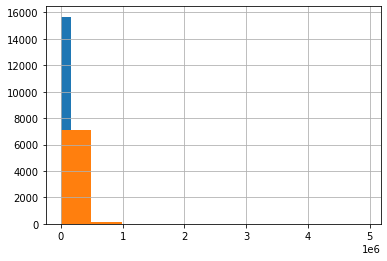

In [212]:
df.groupby('approved').all_closed_creds_sum_ly.hist() #Сумма закрытых кредитов за последний год

Varience for approved is  26225985385.58674
Varience for not approved is  1997555149.2303705


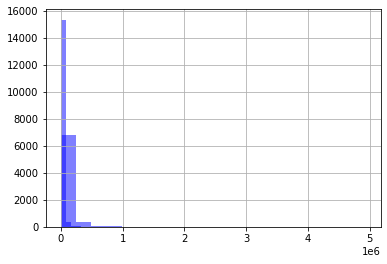

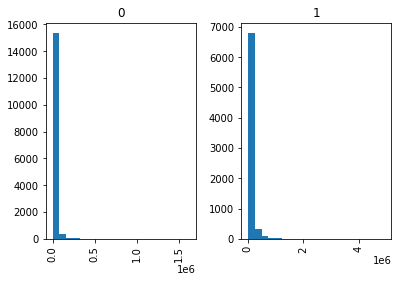

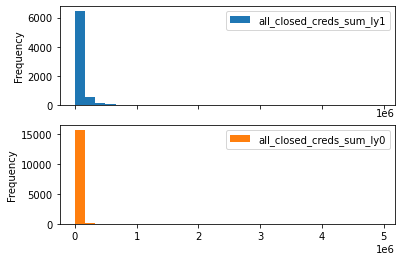

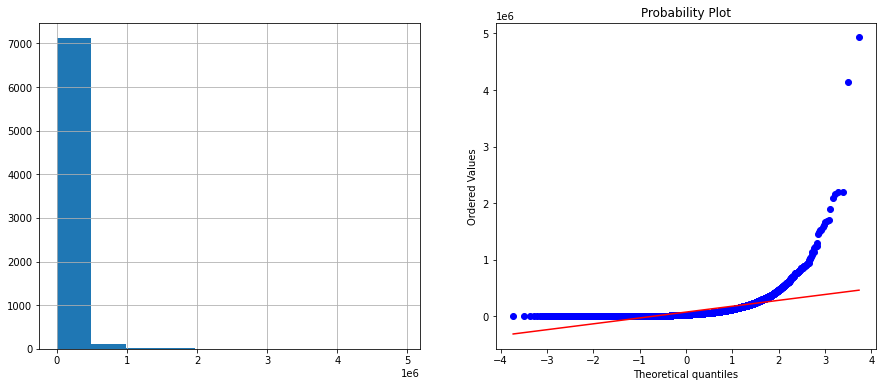

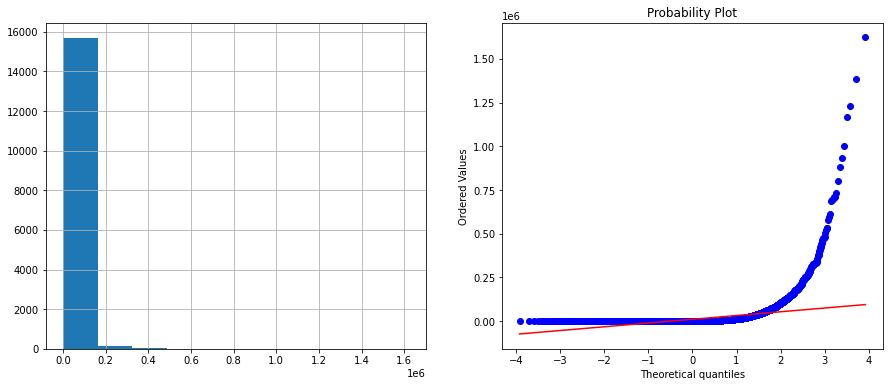

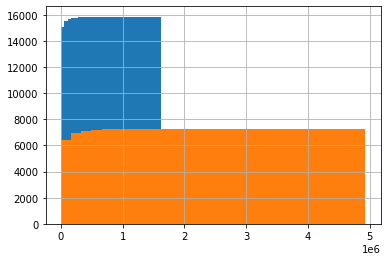

In [163]:
col = 'all_closed_creds_sum_ly'
all_histograms(col)
#решение по выдаче кредитов зависит от all_closed_creds_sum_ly во всех случаях кроме маленьких знчений, так как вероятность выдачи кредита увеличивается и ближе к среднему значению становится равна 100%
#тип данных - количественный, рвспределение - отличное от нормального, количество групп - 2, связанность групп: не связаны. необходимо использовать критерий Манна-Уитни

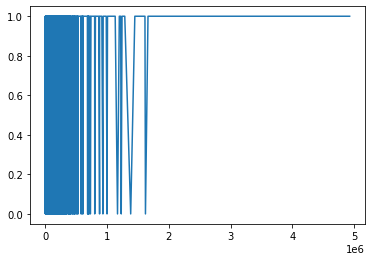

In [157]:
issuance_percentage(col)

In [138]:
print(df.groupby('approved').all_closed_creds_sum_ly.agg(
    max_all_closed_creds_sum_ly  = 'max',
    min_call_closed_creds_sum_ly = 'min',
    ).to_markdown())

|   approved |   max_all_closed_creds_sum_ly |   min_call_closed_creds_sum_ly |
|-----------:|------------------------------:|-------------------------------:|
|          0 |                   1.62211e+06 |                              0 |
|          1 |                   4.92932e+06 |                              0 |


In [139]:
data_all_closed_creds_sum_ly = df.groupby('approved').all_closed_creds_sum_ly.value_counts() 
data_all_closed_creds_sum_ly[1].head(10) #встречаются чаще всего среди одобренных

all_closed_creds_sum_ly
0        1629
6000      101
5000       74
10000      74
4000       72
3000       58
7000       57
13000      57
11000      56
2000       54
Name: all_closed_creds_sum_ly, dtype: int64

In [140]:
data_all_closed_creds_sum_ly[0].head(10) #встречаются чаще всего среди отказанных 

all_closed_creds_sum_ly
0        10568
2000       322
3000       259
4000       234
5000       202
6000       156
1000       145
1483       131
7000       108
10000      107
Name: all_closed_creds_sum_ly, dtype: int64

In [141]:
len_half = int(len(df['all_closed_creds_sum_ly'].value_counts()) / 2)
len_half

2123

In [143]:
data = df['all_closed_creds_sum_ly']
list_data = half(data)
list_data

[0,
 2000,
 3000,
 4000,
 5000,
 6000,
 10000,
 1483,
 7000,
 1000,
 8000,
 9000,
 11000,
 13000,
 15000,
 12000,
 20000,
 14000,
 16000,
 17000,
 30000,
 18000,
 21000,
 22000,
 23000,
 19000,
 5500,
 1500,
 8500,
 25000,
 10500,
 4999,
 3500,
 6500,
 12500,
 17500,
 26000,
 9999,
 28000,
 27000,
 2500,
 24000,
 18500,
 38000,
 32000,
 4500,
 29000,
 20500,
 14500,
 9500,
 35000,
 7500,
 31000,
 16500,
 36000,
 39000,
 11500,
 33000,
 39500,
 15500,
 34000,
 21500,
 44000,
 32500,
 37000,
 19500,
 41000,
 42000,
 40000,
 36500,
 26500,
 30500,
 23500,
 49000,
 45000,
 28500,
 50000,
 48000,
 37500,
 29500,
 31500,
 43500,
 60000,
 13500,
 22500,
 35500,
 61000,
 25500,
 46000,
 52000,
 27500,
 51000,
 3900,
 5900,
 5300,
 59000,
 58000,
 143,
 47000,
 43000,
 45500,
 24500,
 66000,
 55000,
 59500,
 64000,
 54000,
 9900,
 34500,
 62500,
 56000,
 40500,
 78000,
 52500,
 104000,
 38500,
 60500,
 273,
 53000,
 42500,
 58500,
 5483,
 6483,
 48500,
 57000,
 33500,
 62000,
 16483,
 14900,
 5

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


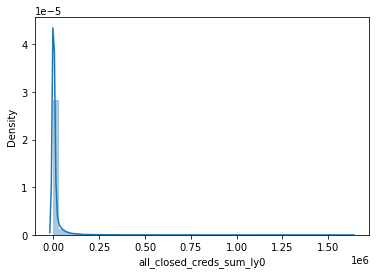

In [164]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


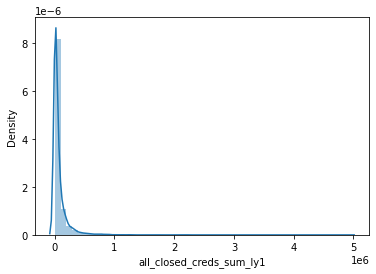

In [165]:
snsplot_1(col) #плотность распределения 

In [144]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly < int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 1
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))


3752


In [145]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly > int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 1
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))


2201


In [146]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly < int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 0
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))


14094


In [147]:
data_all_closed_creds_sum_ly = df.all_closed_creds_sum_ly > int(df.all_closed_creds_sum_ly.mean().round())
filter_all_closed_creds_sum_ly = df['approved'] == 0
a = df.loc[data_all_closed_creds_sum_ly & filter_all_closed_creds_sum_ly]
a = a.all_closed_creds_sum_ly
print(compare_dict(a))


946


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mfo_cred_mean_sum_3lm, dtype: object

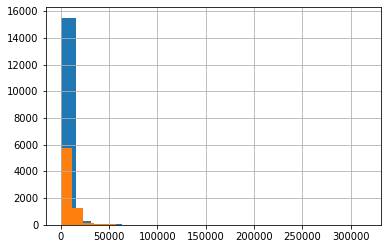

In [147]:
df.groupby('approved').mfo_cred_mean_sum_3lm.hist(bins = 20)

Varience for approved is  107121555.04643464
Varience for not approved is  39539497.4630888


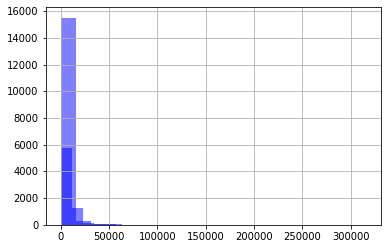

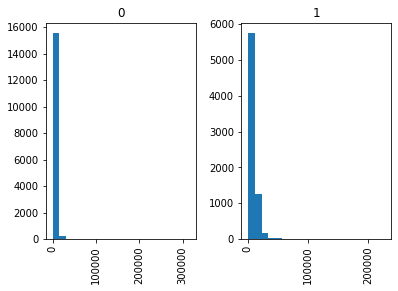

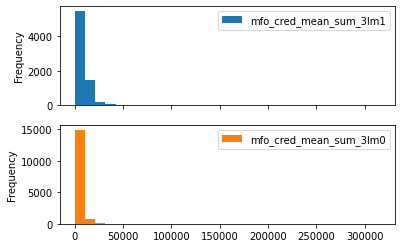

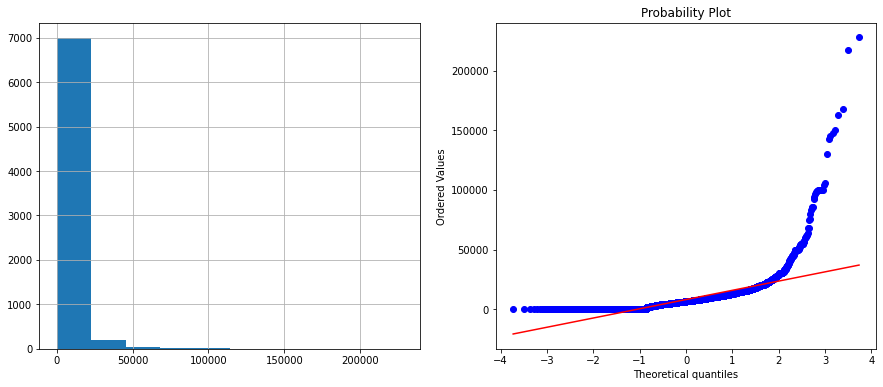

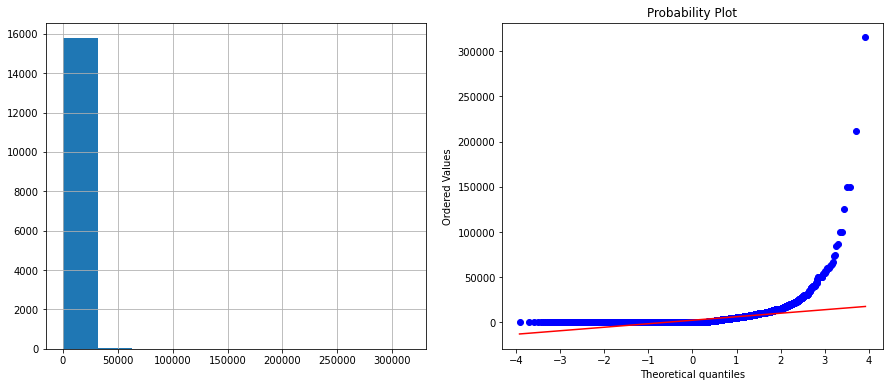

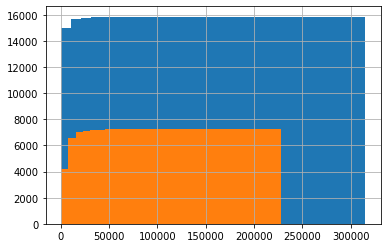

In [169]:
col = 'mfo_cred_mean_sum_3lm' #Средняя сумма МФО кредитов, выданных за последние 3 месяца
all_histograms(col)
#как видим по графикам, разброс значений относительно среднего на выборке одобренных кредитов значительно больше чем на выборке отказанных кредитов.
#решение по выдаче кредитов зависит от mfo_cred_mean_sum_3lm  во всех случаях кроме маленьких знчений

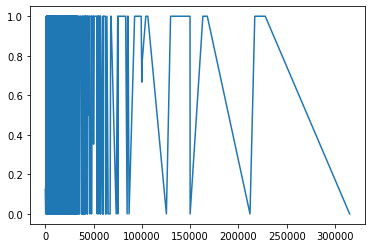

In [170]:
issuance_percentage(col)

In [148]:
print(df.groupby('approved').mfo_cred_mean_sum_3lm.agg(
    max_all_closed_creds_sum_ly  = 'max',
    min_call_closed_creds_sum_ly = 'min',
    ).to_markdown())

|   approved |   max_all_closed_creds_sum_ly |   min_call_closed_creds_sum_ly |
|-----------:|------------------------------:|-------------------------------:|
|          0 |                        315200 |                              0 |
|          1 |                        227778 |                              0 |


In [150]:
data_mfo_cred_mean_sum_3lm = df.groupby('approved').mfo_cred_mean_sum_3lm.value_counts() 
data_mfo_cred_mean_sum_3lm[1].head(10) #встречаются чаще всего среди одобренных

mfo_cred_mean_sum_3lm
0.0        1422
4000.0      111
6000.0      108
5000.0      103
7000.0       96
3000.0       77
8000.0       66
10000.0      65
2000.0       50
15000.0      49
Name: mfo_cred_mean_sum_3lm, dtype: int64

In [151]:
data_mfo_cred_mean_sum_3lm[0].head(10) #встречаются чаще всего среди отказанных 

mfo_cred_mean_sum_3lm
0.0       9975
3000.0     413
2000.0     371
1483.0     343
4000.0     311
5000.0     286
1000.0     183
6000.0     135
2500.0      94
3500.0      92
Name: mfo_cred_mean_sum_3lm, dtype: int64

In [152]:
len_half = int(len(df['mfo_cred_mean_sum_3lm'].value_counts()) / 2)
len_half

2229

In [171]:
data = df['mfo_cred_mean_sum_3lm']
list_data = half(data)

In [156]:
data_mfo_cred_mean_sum_3lm = df.mfo_cred_mean_sum_3lm < int(df.mfo_cred_mean_sum_3lm.mean().round())
filter_mfo_cred_mean_sum_3lm = df['approved'] == 1
a = df.loc[data_mfo_cred_mean_sum_3lm & filter_mfo_cred_mean_sum_3lm]
a = a.mfo_cred_mean_sum_3lm
print(compare_dict(a))

2256


In [157]:
data_mfo_cred_mean_sum_3lm = df.mfo_cred_mean_sum_3lm > int(df.mfo_cred_mean_sum_3lm.mean().round())
filter_mfo_cred_mean_sum_3lm = df['approved'] == 1
a = df.loc[data_mfo_cred_mean_sum_3lm & filter_mfo_cred_mean_sum_3lm]
a = a.mfo_cred_mean_sum_3lm
print(compare_dict(a))

3534


In [158]:
data_mfo_cred_mean_sum_3lm = df.mfo_cred_mean_sum_3lm < int(df.mfo_cred_mean_sum_3lm.mean().round())
filter_mfo_cred_mean_sum_3lm = df['approved'] == 0
a = df.loc[data_mfo_cred_mean_sum_3lm & filter_mfo_cred_mean_sum_3lm]
a = a.mfo_cred_mean_sum_3lm
print(compare_dict(a))

12465


In [159]:
data_mfo_cred_mean_sum_3lm = df.mfo_cred_mean_sum_3lm > int(df.mfo_cred_mean_sum_3lm.mean().round())
filter_mfo_cred_mean_sum_3lm = df['approved'] == 0
a = df.loc[data_mfo_cred_mean_sum_3lm & filter_mfo_cred_mean_sum_3lm]
a = a.mfo_cred_mean_sum_3lm
print(compare_dict(a))

2631


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: delay_more_sum_all, dtype: object

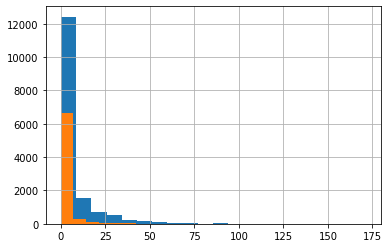

In [172]:
df.groupby('approved').delay_more_sum_all.hist(bins = 20)

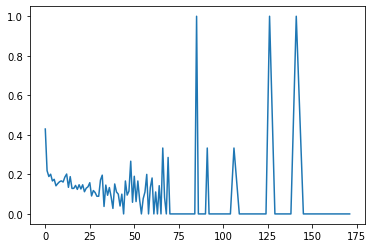

In [174]:
issuance_percentage(col)

Varience for approved is  48.69997659711444
Varience for not approved is  168.93887128940722


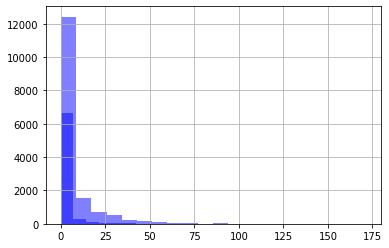

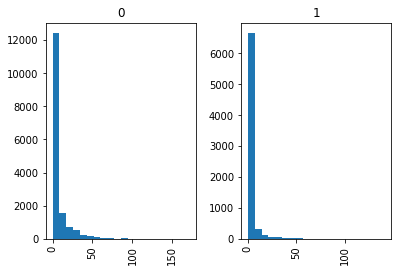

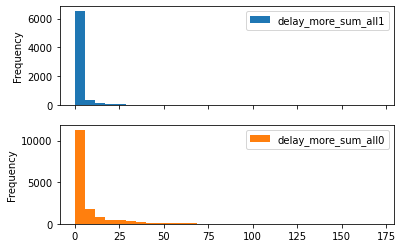

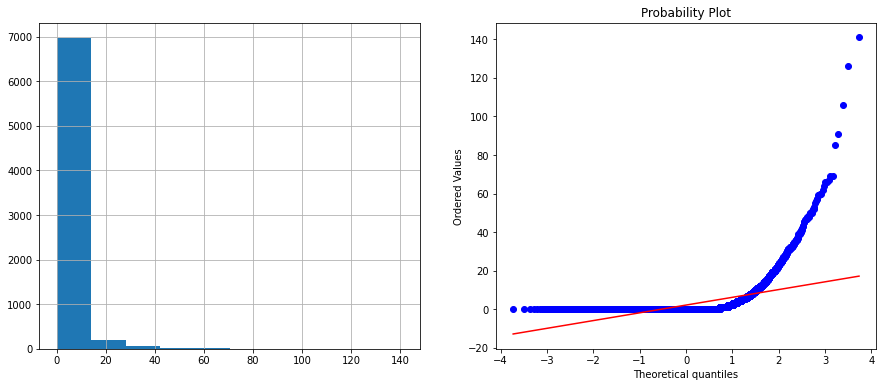

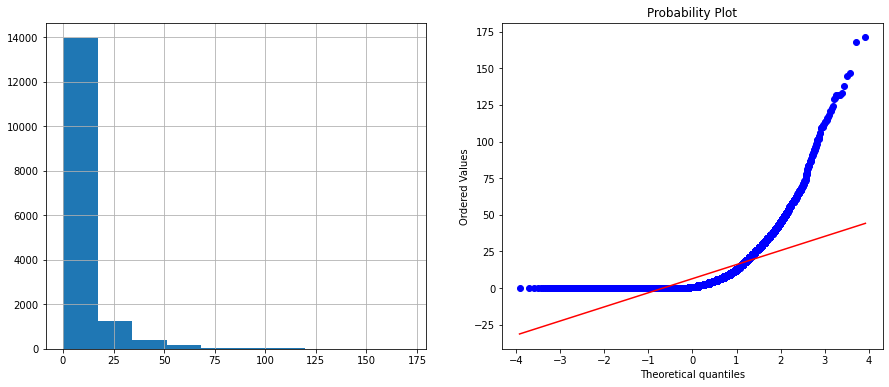

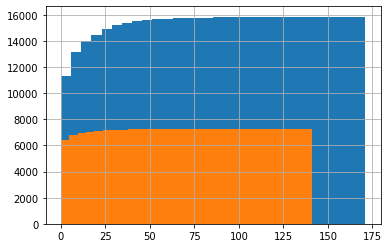

In [173]:
col = 'delay_more_sum_all' #Количество просрочек более чем на 90 дней по всем кредитам
all_histograms(col)
#как видим по графикам, разброс значений относительно среднего на выборке одобренных кредитов значительно меньше чем на выборке отказанных кредитов.
#решение по выдаче кредитов зависит от delay_more_sum_all, вероятность выдачи кредита повышается при маленьких значениях и становится практически равно 0 при больших значениях

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


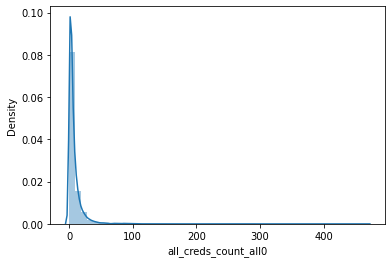

In [182]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


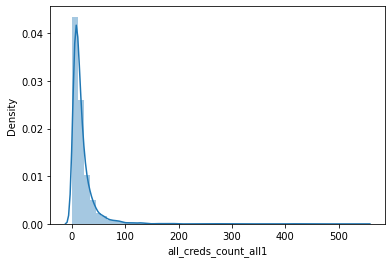

In [181]:
snsplot_1(col) #плотность распределения 

In [175]:
df['delay_more_sum_all'].value_counts().head(20)

0     12950
1      1769
2      1009
3       757
4       744
5       594
6       506
7       423
8       387
9       311
10      279
11      247
12      223
14      175
13      171
15      163
16      147
18      145
19      122
17      118
Name: delay_more_sum_all, dtype: int64

In [161]:
df.delay_more_sum_all.describe()

count    23116.000000
mean         5.084487
std         11.628365
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        171.000000
Name: delay_more_sum_all, dtype: float64

In [162]:
data_delay_more_sum_all = df.groupby('approved').delay_more_sum_all.unique()
len(data_delay_more_sum_all[1])

68

In [163]:
len(data_delay_more_sum_all[0])

122

In [169]:
df.groupby('delay_more_sum_all').approved.count().head(50)

delay_more_sum_all
0     12950
1      1769
2      1009
3       757
4       744
5       594
6       506
7       423
8       387
9       311
10      279
11      247
12      223
13      171
14      175
15      163
16      147
17      118
18      145
19      122
20      111
21       95
22       98
23      100
24       80
25       76
26       77
27       93
28       74
29       56
30       56
31       70
32       51
33       53
34       48
35       53
36       45
37       35
38       36
39       33
40       36
41       20
42       25
43       30
44       14
45       18
46       21
47       26
48       15
49       17
Name: approved, dtype: int64

In [182]:
data_1_delay_more_sum_all = np.array(data_delay_more_sum_all[1])
data_0_delay_more_sum_all = np.array(data_delay_more_sum_all[0])
names_0_delay_more_sum_all = [x for x in data_0_delay_more_sum_all if x not in data_1_delay_more_sum_all]
names_0_delay_more_sum_all

[86,
 78,
 84,
 70,
 44,
 61,
 117,
 83,
 58,
 65,
 168,
 76,
 82,
 63,
 102,
 54,
 110,
 71,
 98,
 124,
 73,
 132,
 138,
 88,
 118,
 90,
 68,
 74,
 79,
 92,
 72,
 130,
 80,
 116,
 123,
 94,
 114,
 113,
 171,
 101,
 109,
 95,
 96,
 77,
 121,
 93,
 87,
 133,
 115,
 147,
 111,
 81,
 129,
 112,
 145,
 103,
 104]

In [173]:
df['delay_more_sum_all'].value_counts().head()

0    12950
1     1769
2     1009
3      757
4      744
Name: delay_more_sum_all, dtype: int64

approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: all_creds_count_all, dtype: object

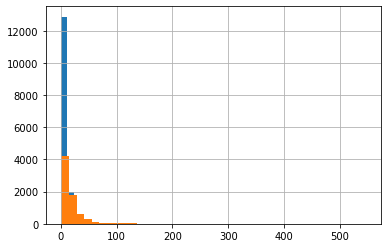

In [180]:
df.groupby('approved').all_creds_count_all.hist(bins = 40) #Общее количество кредитов

Varience for approved is  645.91507921131
Varience for not approved is  166.01390015645717


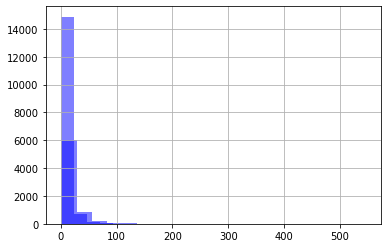

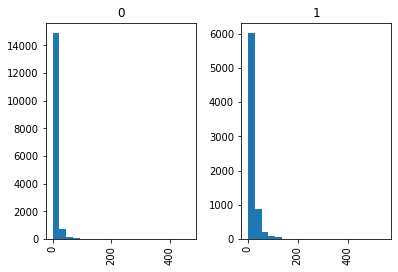

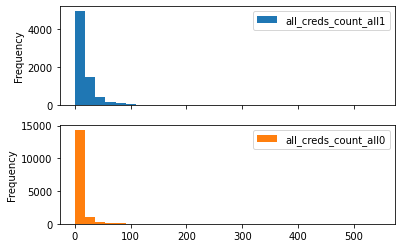

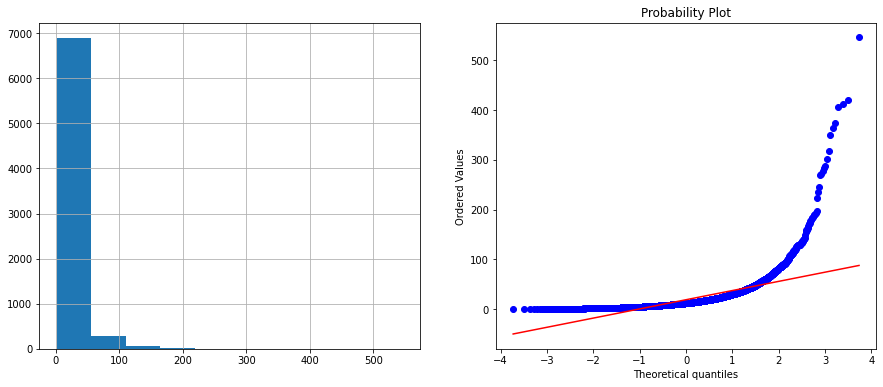

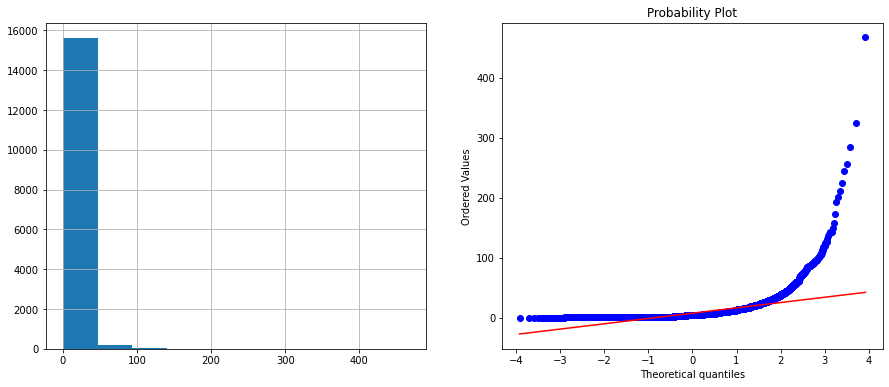

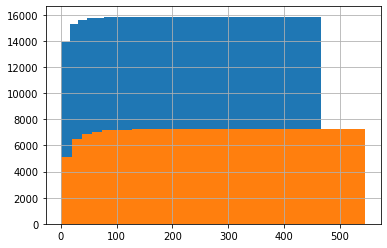

In [177]:
col = 'all_creds_count_all'
all_histograms(col)
#как видим по графикам, разброс значений относительно среднего на выборке одобренных кредитов значительно бошльше чем на выборке отказанных кредитов.
#решение по выдаче кредитов зависит от all_creds_count_all, вероятность выдачи кредита в целом высокая при маленьких значеиниях

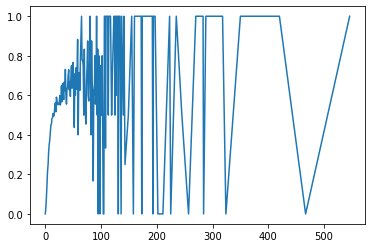

In [178]:
issuance_percentage(col)

In [190]:
print(df.groupby('approved').all_creds_count_all.agg(
    max_all_creds_count_all  = 'max',
    min_all_creds_count_all = 'min',
    ).to_markdown())

|   approved |   max_all_creds_count_all |   min_all_creds_count_all |
|-----------:|--------------------------:|--------------------------:|
|          0 |                       467 |                         0 |
|          1 |                       546 |                         1 |


In [189]:
df['all_creds_count_all'].value_counts().head(50)

1     3067
2     2523
3     1974
4     1720
5     1476
6     1267
7     1064
8      939
9      806
10     759
11     697
12     567
13     555
14     467
15     435
16     362
17     336
18     296
19     273
20     237
21     235
22     208
23     191
24     170
26     157
25     150
28     123
27     118
30     118
33     102
31      94
29      88
32      85
35      77
34      69
36      67
37      58
38      54
39      52
41      50
42      48
40      47
43      43
44      39
45      37
46      36
48      33
50      30
0       29
57      25
Name: all_creds_count_all, dtype: int64

In [174]:
df.all_creds_count_all.describe()

count    23116.000000
mean        11.403876
std         18.543562
min          0.000000
25%          3.000000
50%          6.000000
75%         13.000000
max        546.000000
Name: all_creds_count_all, dtype: float64

In [175]:
data_all_creds_count_all = df.groupby('approved').all_creds_count_all.unique()
len(data_all_creds_count_all[1])

164

In [176]:
len(data_all_creds_count_all[0])

125

In [193]:
int(df.all_creds_count_all.mean().round())

11

In [186]:
df.groupby('all_creds_count_all').approved.sum().head(50)

all_creds_count_all
0       0
1     100
2     208
3     290
4     369
5     367
6     397
7     374
8     350
9     331
10    341
11    316
12    274
13    270
14    237
15    215
16    183
17    181
18    166
19    141
20    140
21    134
22    115
23    107
24     94
25     84
26     94
27     65
28     70
29     57
30     67
31     62
32     53
33     59
34     46
35     48
36     49
37     35
38     30
39     33
40     30
41     35
42     35
43     27
44     26
45     22
46     25
47     15
48     21
49     14
Name: approved, dtype: int64

Varience for approved is  36654.95145044512
Varience for not approved is  805082.1492228142


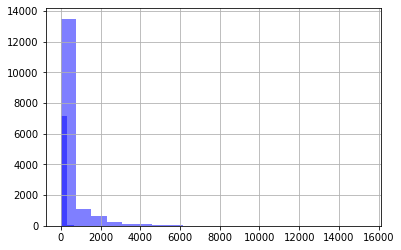

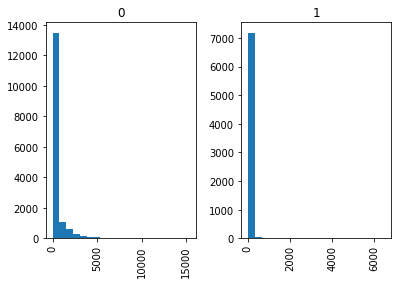

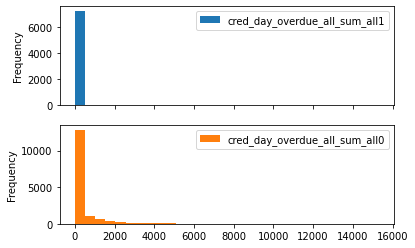

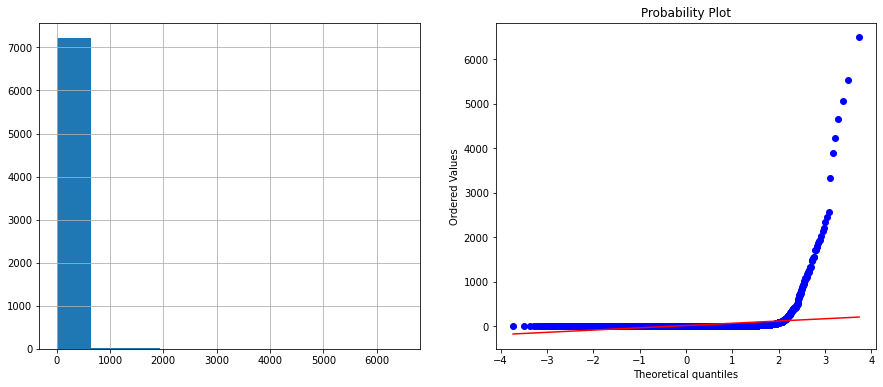

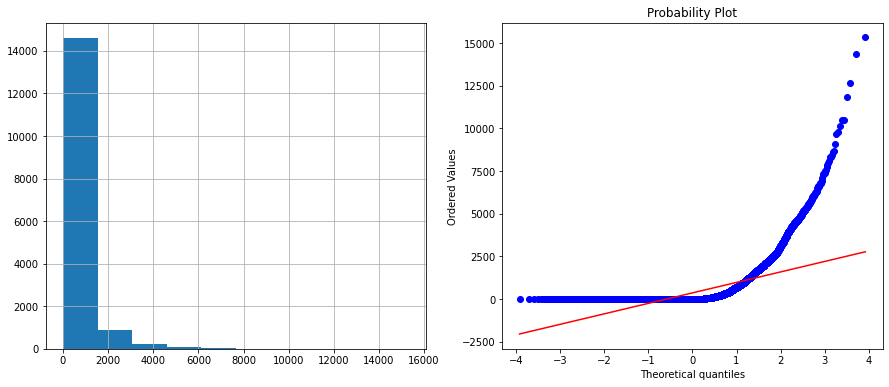

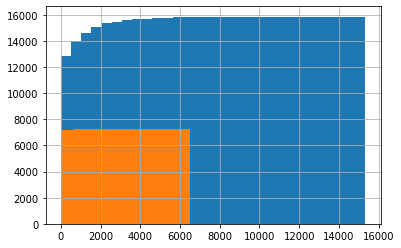

In [183]:
col = 'cred_day_overdue_all_sum_all'
all_histograms(col) #Суммарное количество дней просрочки текущих активных кредитов
#как видим по графикам, разброс значений относительно среднего на выборке одобренных кредитов значительно меньше чем на выборке отказанных кредитов.
#решение по выдаче кредитов зависит от cred_day_overdue_all_sum_all, вероятность выдачи кредита повышается при маленьких значениях и становится практически равно 0 при больших значениях
#распределение на выборке одобренныхкредитов похоже на нормальное до 2 теоретических квантилей

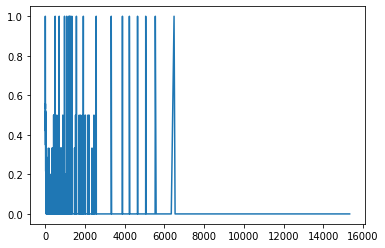

In [184]:
issuance_percentage(col)

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


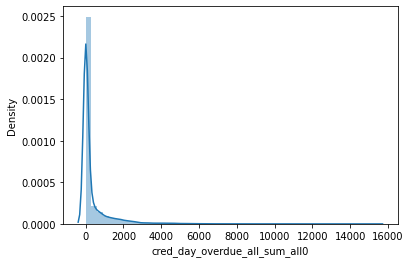

In [186]:
snsplot_0(col) #плотность распределения 

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


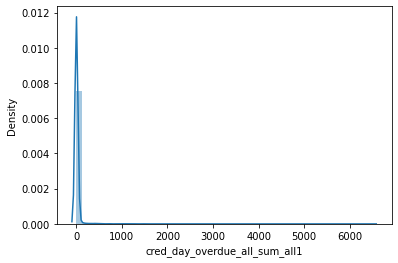

In [185]:
snsplot_1(col) #плотность распределения 

In [195]:
df['cred_day_overdue_all_sum_all'].value_counts().head(50)

0     15046
14       69
7        68
8        68
9        66
11       66
5        64
12       62
6        61
16       61
13       59
17       58
10       57
15       55
20       51
4        48
27       46
18       46
19       42
21       41
23       39
24       38
28       37
26       37
42       37
30       36
35       36
22       35
29       35
31       33
25       32
36       32
41       31
33       31
38       30
32       30
3        29
47       29
34       28
40       25
37       25
43       24
45       23
51       22
53       21
65       21
46       21
39       21
64       21
2        21
Name: cred_day_overdue_all_sum_all, dtype: int64

In [196]:
print(df.groupby('approved').cred_day_overdue_all_sum_all.agg(
    max_cred_day_overdue_all_sum_all  = 'max',
    min_cred_day_overdue_all_sum_all = 'min',
    ).to_markdown())

|   approved |   max_cred_day_overdue_all_sum_all |   min_cred_day_overdue_all_sum_all |
|-----------:|-----------------------------------:|-----------------------------------:|
|          0 |                              15327 |                                  0 |
|          1 |                               6484 |                                  0 |


In [204]:
df.groupby('cred_day_overdue_all_sum_all').approved.count().head(50)

cred_day_overdue_all_sum_all
0     15046
1         2
2        21
3        29
4        48
5        64
6        61
7        68
8        68
9        66
10       57
11       66
12       62
13       59
14       69
15       55
16       61
17       58
18       46
19       42
20       51
21       41
22       35
23       39
24       38
25       32
26       37
27       46
28       37
29       35
30       36
31       33
32       30
33       31
34       28
35       36
36       32
37       25
38       30
39       21
40       25
41       31
42       37
43       24
44       17
45       23
46       21
47       29
48       18
49       19
Name: approved, dtype: int64

In [216]:
data_cred_day_overdue_all_sum_all = df.groupby('approved').cred_day_overdue_all_sum_all.value_counts() 
len(data_cred_day_overdue_all_sum_all[1]) 

224

In [217]:
len(data_cred_day_overdue_all_sum_all[0])

2297

In [210]:
len_half = int(len(df['cred_day_overdue_all_sum_all'].value_counts()) / 2)
len_half

1159

In [187]:
data = df['cred_day_overdue_all_sum_all']
list_data = half(data)

In [209]:
data_cred_day_overdue_all_sum_all = df.cred_day_overdue_all_sum_all < int(df.cred_day_overdue_all_sum_all.mean().round())
filter_cred_day_overdue_all_sum_all = df['approved'] == 1
a = df.loc[data_cred_day_overdue_all_sum_all & filter_cred_day_overdue_all_sum_all]
a = a.cred_day_overdue_all_sum_all
print(compare_dict(a))

7175


In [212]:
data_cred_day_overdue_all_sum_all = df.cred_day_overdue_all_sum_all > int(df.cred_day_overdue_all_sum_all.mean().round())
filter_cred_day_overdue_all_sum_all = df['approved'] == 1
a = df.loc[data_cred_day_overdue_all_sum_all & filter_cred_day_overdue_all_sum_all]
a = a.cred_day_overdue_all_sum_all
print(compare_dict(a))

73


In [213]:
data_cred_day_overdue_all_sum_all = df.cred_day_overdue_all_sum_all < int(df.cred_day_overdue_all_sum_all.mean().round())
filter_cred_day_overdue_all_sum_all = df['approved'] == 0
a = df.loc[data_cred_day_overdue_all_sum_all & filter_cred_day_overdue_all_sum_all]
a = a.cred_day_overdue_all_sum_all
print(compare_dict(a))

11866


In [214]:
data_cred_day_overdue_all_sum_all = df.cred_day_overdue_all_sum_all > int(df.cred_day_overdue_all_sum_all.mean().round())
filter_cred_day_overdue_all_sum_all = df['approved'] == 0
a = df.loc[data_cred_day_overdue_all_sum_all & filter_cred_day_overdue_all_sum_all]
a = a.cred_day_overdue_all_sum_all
print(compare_dict(a))

2801


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cred_max_overdue_max_3lm, dtype: object

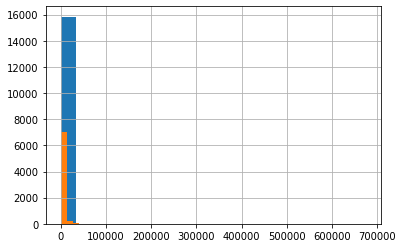

In [191]:
df.groupby('approved').cred_max_overdue_max_3lm.hist(bins = 20)

Varience for approved is  37946729.83802966
Varience for not approved is  55490828.09946678


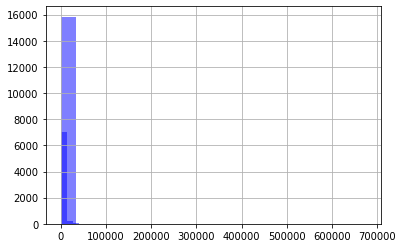

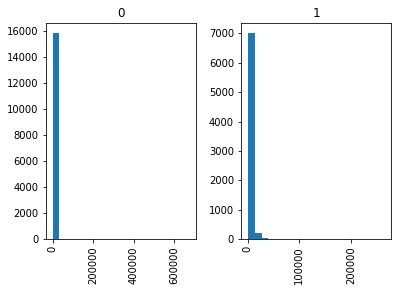

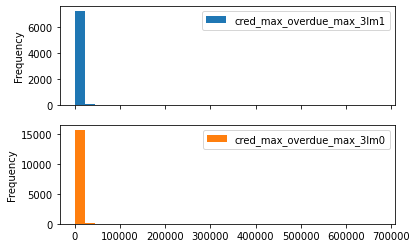

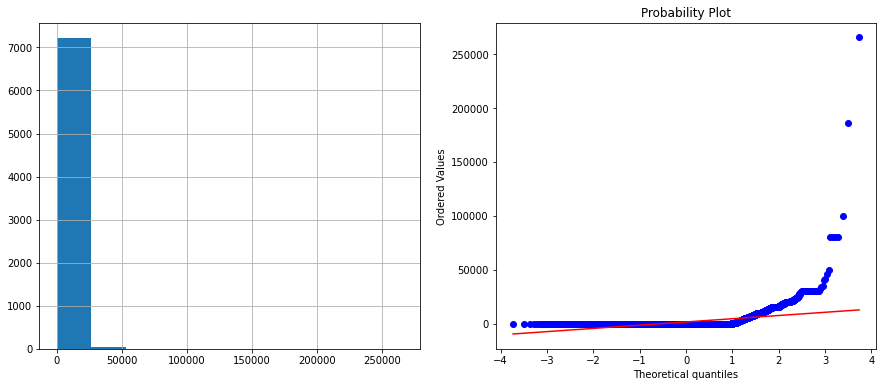

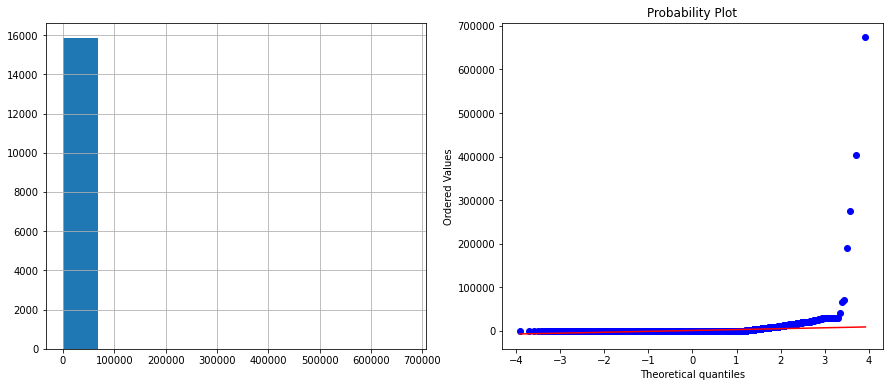

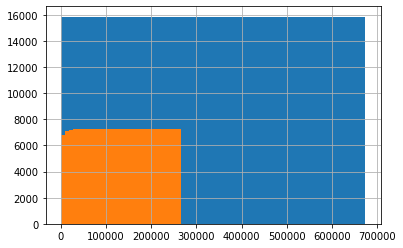

In [192]:
col = 'cred_max_overdue_max_3lm' #Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца
all_histograms(col)
#решение по выдаче кредитов зависит от ccred_max_overdue_max_3lm, вероятность выдачи кредита повышается при маленьких значениях и становится практически равно 0 при средних и  больших значениях
#распределение на выборке отказанных кредитов похоже на нормальное 

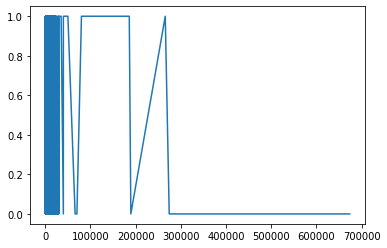

In [190]:
issuance_percentage(col)

In [218]:
df['cred_max_overdue_max_3lm'].value_counts().head(10)

0.0        19951
5000.0       161
4000.0       155
10000.0      140
3000.0       139
6000.0       124
15000.0      101
2000.0        99
7000.0        98
8000.0        72
Name: cred_max_overdue_max_3lm, dtype: int64

In [219]:
df['cred_max_overdue_max_3lm'].describe()

count     23116.000000
mean       1107.137568
std        7073.931364
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      673495.420000
Name: cred_max_overdue_max_3lm, dtype: float64

In [221]:
df.groupby('cred_max_overdue_max_3lm').approved.count().head(50)

cred_max_overdue_max_3lm
0.00      19951
5.00          1
6.26          1
9.60          1
13.02         1
17.69         1
21.82         1
23.07         1
27.76         1
30.00         1
33.91         1
35.18         1
36.33         1
39.03         1
40.00         1
40.41         1
47.23         1
47.25         1
54.24         1
59.17         1
60.12         1
60.93         1
62.53         3
64.14         1
65.83         1
69.37         1
73.19         1
73.48         1
74.40         2
81.24         2
85.69         1
86.14         1
89.18         2
94.27         1
101.43        1
107.97        1
125.99        1
131.98        2
149.80        1
152.44        1
153.03        1
153.63        1
157.90        1
158.10        1
160.97        1
161.95        1
180.76        1
182.67        1
184.45        1
186.27        1
Name: approved, dtype: int64

In [222]:
data_cred_max_overdue_max_3lm = df.groupby('approved').cred_max_overdue_max_3lm.value_counts() 
data_cred_max_overdue_max_3lm[1].head()


cred_max_overdue_max_3lm
0.0        6086
10000.0      68
15000.0      61
5000.0       48
4000.0       44
Name: cred_max_overdue_max_3lm, dtype: int64

In [223]:
data_cred_max_overdue_max_3lm = df.groupby('approved').cred_max_overdue_max_3lm.value_counts() 
data_cred_max_overdue_max_3lm[0].head()

cred_max_overdue_max_3lm
0.0       13865
5000.0      113
3000.0      112
4000.0      111
6000.0       86
Name: cred_max_overdue_max_3lm, dtype: int64

In [225]:
len_half = int(len(df['cred_max_overdue_max_3lm'].value_counts()) / 2)
len_half

578

In [226]:
data = df['cred_max_overdue_max_3lm']
list_data = half(data)

In [240]:
len(df['cred_max_overdue_max_3lm'])

23116

In [237]:
data_cred_max_overdue_max_3lm = df.cred_max_overdue_max_3lm < int(df.cred_max_overdue_max_3lm.mean().round())
filter_cred_max_overdue_max_3lm = df['approved'] == 1
a = df.loc[data_cred_max_overdue_max_3lm & filter_cred_max_overdue_max_3lm]
a = a.cred_max_overdue_max_3lm
print(len(df.loc[data_cred_max_overdue_max_3lm & filter_cred_max_overdue_max_3lm]))

6252


In [229]:
data_cred_max_overdue_max_3lm = df.cred_max_overdue_max_3lm > int(df.cred_max_overdue_max_3lm.mean().round())
filter_cred_max_overdue_max_3lm = df['approved'] == 1
a = df.loc[data_cred_max_overdue_max_3lm & filter_cred_max_overdue_max_3lm]
a = a.cred_max_overdue_max_3lm
print(compare_dict(a))

848


In [230]:
data_cred_max_overdue_max_3lm = df.cred_max_overdue_max_3lm < int(df.cred_max_overdue_max_3lm.mean().round())
filter_cred_max_overdue_max_3lm = df['approved'] == 0
a = df.loc[data_cred_max_overdue_max_3lm & filter_cred_max_overdue_max_3lm]
a = a.cred_max_overdue_max_3lm
print(compare_dict(a))

14072


In [232]:
data_cred_max_overdue_max_3lm = df.cred_max_overdue_max_3lm > int(df.cred_max_overdue_max_3lm.mean().round())
filter_cred_max_overdue_max_3lm = df['approved'] == 0
a = df.loc[data_cred_max_overdue_max_3lm & filter_cred_max_overdue_max_3lm]
a = a.cred_max_overdue_max_3lm
print(compare_dict(a))

1418


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mfo_closed_count_ly, dtype: object

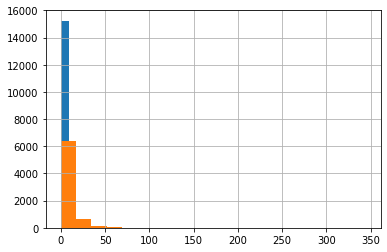

In [194]:
df.groupby('approved').mfo_closed_count_ly.hist(bins=20) #Количество закрытых МФО кредитов, взятых за последний год

Varience for approved is  193.40644422038446
Varience for not approved is  21.874148048985496


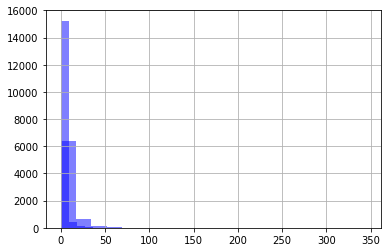

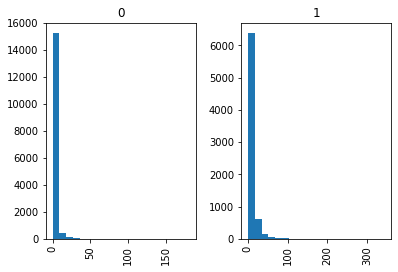

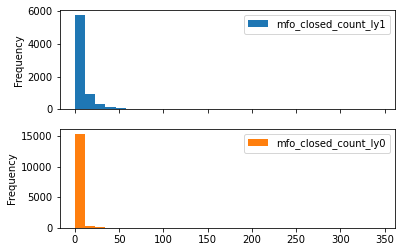

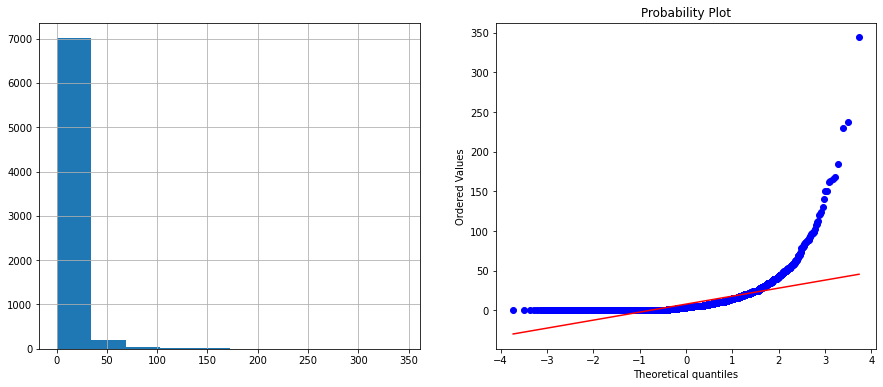

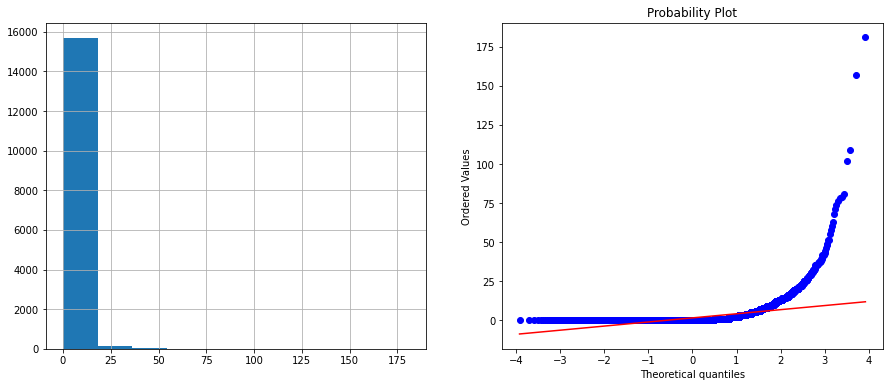

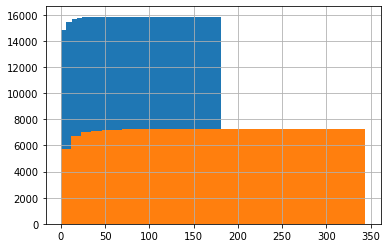

In [196]:
col = 'mfo_closed_count_ly'
all_histograms(col)
#решение по выдаче кредитов зависит от ccred_max_overdue_max_3lm, вероятность выдачи повышается с ростом значения
#разброс относительно среднего на выборке одобренных кредитов значительно больше чем на выборке отказанных кредитов

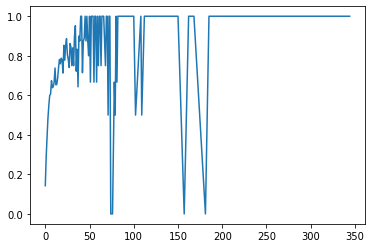

In [197]:
issuance_percentage(col)

In [19]:
df.mfo_closed_count_ly.value_counts().head(50)

0     12723
1      2425
2      1433
3      1052
4       751
5       629
6       545
7       390
8       387
9       337
10      243
11      233
12      196
13      177
14      176
15      139
17      104
18       99
16       96
19       86
20       80
21       68
22       63
23       55
24       53
25       51
29       32
26       32
28       29
27       27
31       25
34       21
32       20
33       20
35       18
36       18
40       16
39       16
30       16
42       14
37       14
38       10
41        9
44        9
50        9
43        8
46        8
48        8
54        8
45        7
Name: mfo_closed_count_ly, dtype: int64

In [10]:
data_mfo_closed_count_ly = df.groupby('approved').mfo_closed_count_ly.unique()
len(data_mfo_closed_count_ly[0]) 

62

In [11]:
len(data_mfo_closed_count_ly[1]) 

110

In [15]:
print(df.groupby('approved').mfo_closed_count_ly.agg(
    max_mfo_closed_count_ly  = 'max',
    min_mfo_closed_count_ly = 'min',
    ).to_markdown())

|   approved |   max_mfo_closed_count_ly |   min_mfo_closed_count_ly |
|-----------:|--------------------------:|--------------------------:|
|          0 |                       181 |                         0 |
|          1 |                       344 |                         0 |


In [21]:
data_mfo_closed_count_ly = df.groupby('approved').mfo_closed_count_ly.value_counts() 
data_mfo_closed_count_ly[1].head(10) #встречаются чаще всего среди одобренных


mfo_closed_count_ly
0    1815
1     696
2     558
3     509
4     412
5     377
6     331
7     263
8     247
9     217
Name: mfo_closed_count_ly, dtype: int64

In [22]:
data_mfo_closed_count_ly[0].head(10) #встречаются чаще всего среди отказанных 

mfo_closed_count_ly
0    10908
1     1729
2      875
3      543
4      339
5      252
6      214
8      140
7      127
9      120
Name: mfo_closed_count_ly, dtype: int64

In [25]:
df.mfo_closed_count_ly.describe()

count    23116.000000
mean         3.474087
std          9.202313
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        344.000000
Name: mfo_closed_count_ly, dtype: float64

In [24]:
df.groupby('mfo_closed_count_ly').approved.sum().head(50)

mfo_closed_count_ly
0     1815
1      696
2      558
3      509
4      412
5      377
6      331
7      263
8      247
9      217
10     162
11     172
12     128
13     116
14     121
15     103
16      75
17      79
18      78
19      67
20      57
21      58
22      49
23      47
24      47
25      41
26      25
27      20
28      25
29      27
30      12
31      21
32      15
33      18
34      20
35      13
36      15
37       9
38       9
39      14
40      16
41       9
42      10
43       7
44       8
45       7
46       7
47       6
48       7
49       4
Name: approved, dtype: int64

Varience for approved is  61789497.620932996
Varience for not approved is  2059514513.4201097


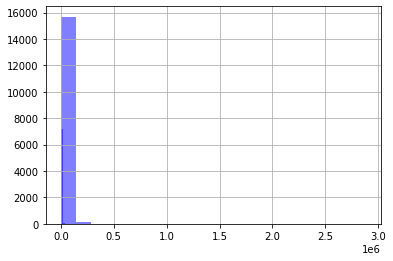

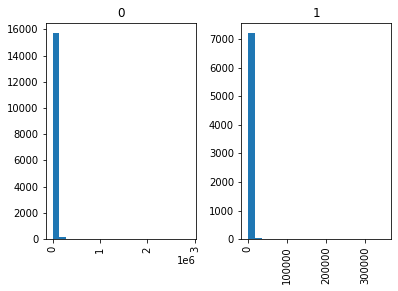

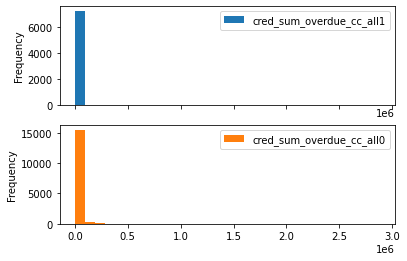

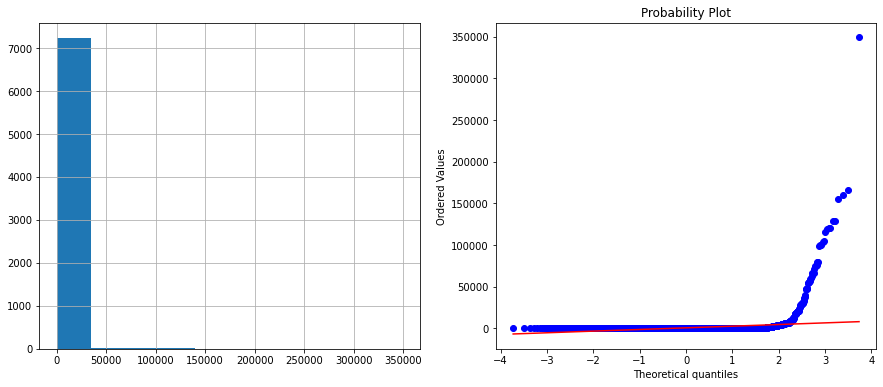

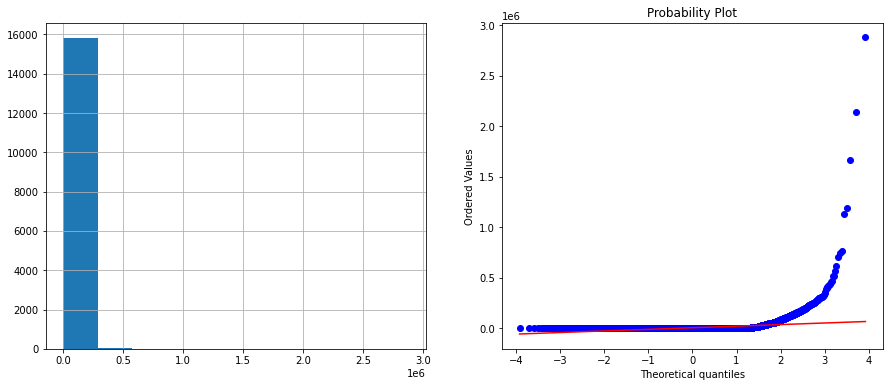

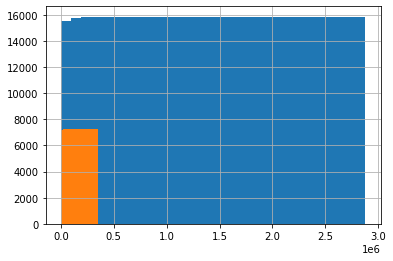

In [207]:
col = 'cred_sum_overdue_cc_all' #Сумма просрочек по кредитным картам
all_histograms(col) 
#распределение на обоих выборках похоже на нормальное до 2 теоретических квантилей
#решение по выдаче кредитов зависит от ccred_sum_overdue_cc_all, вероятность выдачи становится равно 0 по всех случаях кроме минимальных значений
#разброс относительно среднего на выборке одобренных кредитов значительно меньше чем на выборке отказанных кредитов
#вероятность выдачи кредита низкая при наличии просрочек по кредитным картам

approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cred_sum_overdue_cc_all, dtype: object

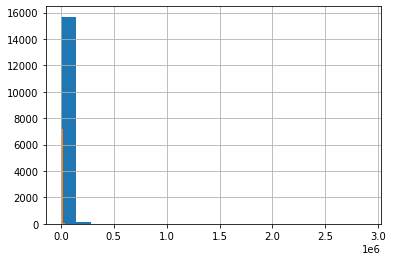

In [200]:
df.groupby('approved').cred_sum_overdue_cc_all.hist(bins=20)

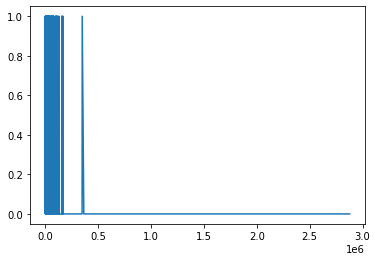

In [199]:
issuance_percentage(col)

In [201]:
df['cred_sum_overdue_cc_all'].value_counts().head(20)

0.00        20281
600.00          9
100.00          7
15000.00        5
1500.00         4
5000.00         4
700.00          3
1000.00         3
5520.36         2
3678.63         2
5800.00         2
2500.00         2
2749.34         2
6000.00         2
58948.04        2
30000.00        2
2516.52         2
300.00          2
640.36          2
200.00          2
Name: cred_sum_overdue_cc_all, dtype: int64

In [202]:
data_cred_sum_overdue_cc_all = df.groupby('approved').cred_sum_overdue_cc_all.unique()
len(data_cred_sum_overdue_cc_all[0]) 

2371

In [203]:
len(data_cred_sum_overdue_cc_all[1]) 

419

In [205]:
df.groupby('cred_sum_overdue_cc_all').approved.sum().head(20)

cred_sum_overdue_cc_all
0.00     6851
0.80        0
2.00        0
2.81        0
3.35        0
8.40        1
9.15        1
15.55       1
17.11       0
17.86       0
18.05       0
19.28       0
21.86       0
26.35       0
30.00       0
35.84       0
37.10       1
42.37       0
42.89       0
47.80       0
Name: approved, dtype: int64

Varience for approved is  0.14526858540043047
Varience for not approved is  0.25046202372792375


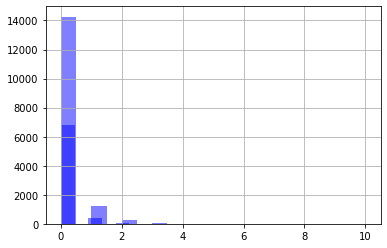

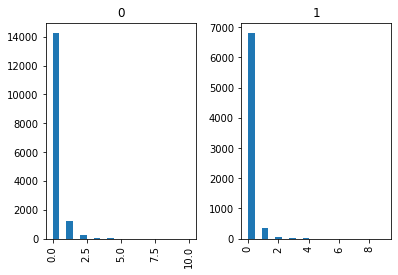

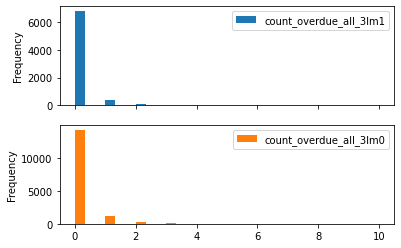

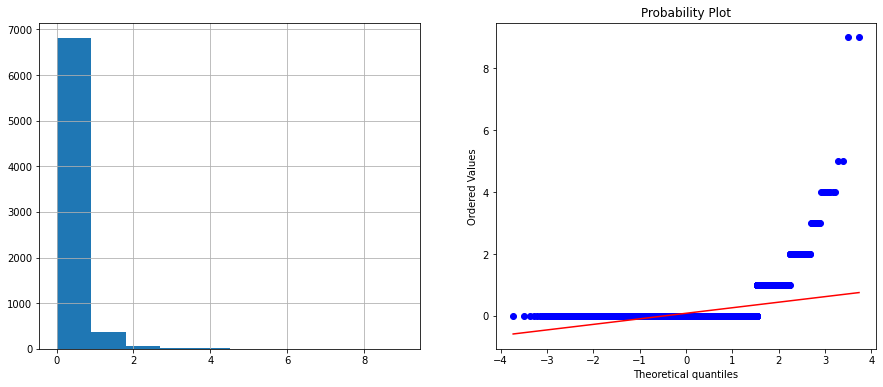

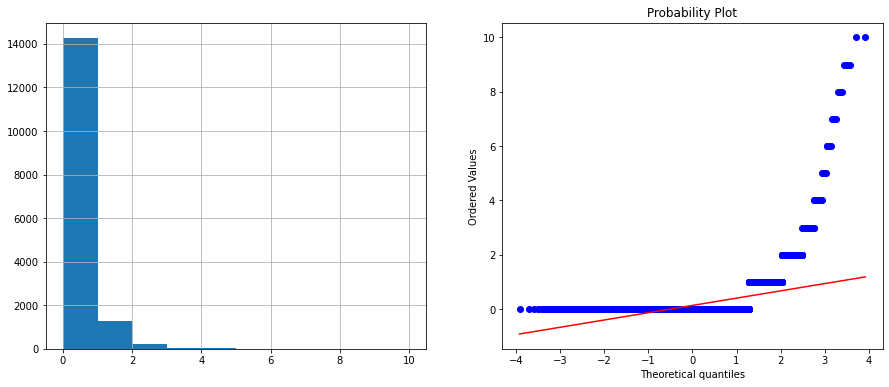

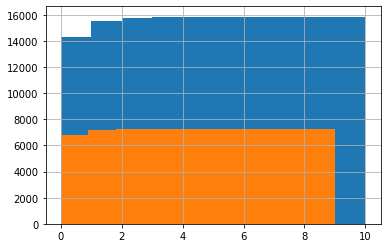

In [210]:
col = 'count_overdue_all_3lm' #Количество кредитов на просрочке, взятых за последние 3 месяца
all_histograms(col)
#решение по выдаче кредитов зависит от count_overdue_all_3lm, вероятность выдачи уменьшается с возрастанием значений


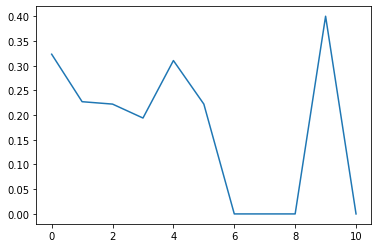

In [211]:
issuance_percentage(col)

In [274]:
df['count_overdue_all_3lm'].value_counts()

0     21068
1      1625
2       297
3        67
4        29
5         9
6         6
7         5
9         5
8         3
10        2
Name: count_overdue_all_3lm, dtype: int64

In [275]:
df.groupby('approved').count_overdue_all_3lm.unique()

approved
0    [0, 1, 3, 2, 4, 7, 10, 8, 9, 6, 5]
1                 [0, 1, 2, 3, 4, 5, 9]
Name: count_overdue_all_3lm, dtype: object

In [276]:
df['count_overdue_all_3lm'].unique()

array([ 0,  1,  3,  2,  4,  7, 10,  8,  9,  5,  6])

In [218]:
df.groupby('count_overdue_all_3lm').approved.sum()

count_overdue_all_3lm
0     6808
1      369
2       66
3       13
4        9
5        2
6        0
7        0
8        0
9        2
10       0
Name: approved, dtype: int64

approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: all_creds_count_lm, dtype: object

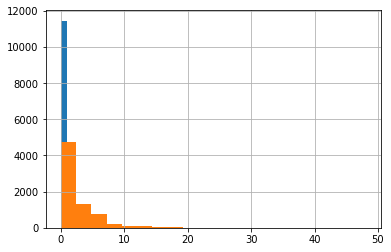

In [214]:
df.groupby('approved').all_creds_count_lm.hist(bins = 20) #Количество кредитов, взятых за последний месяц

Varience for approved is  9.670513719458988
Varience for not approved is  0.9851921274736046


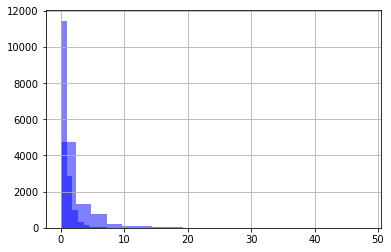

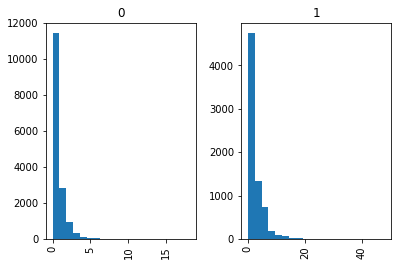

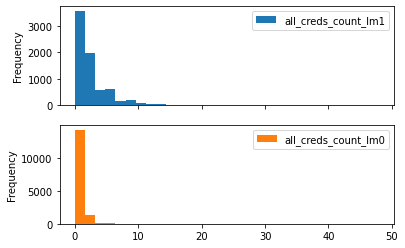

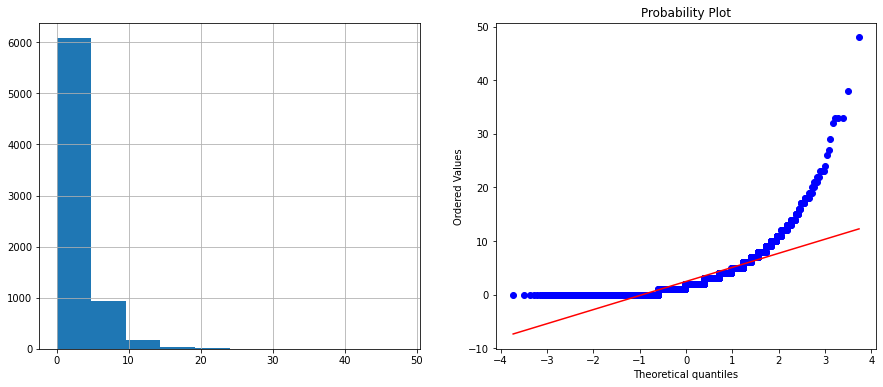

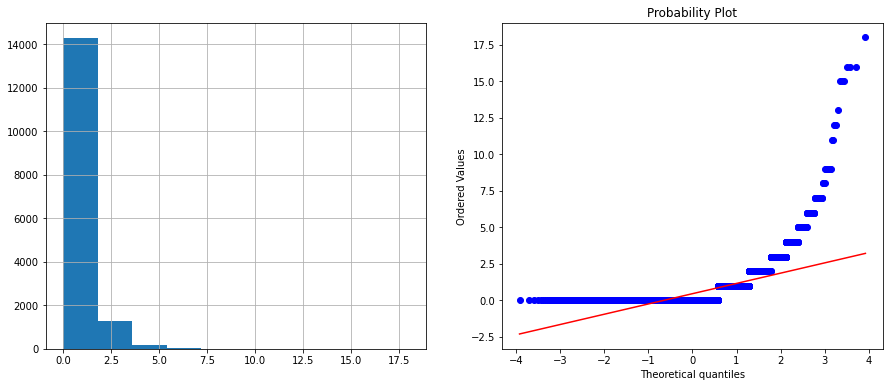

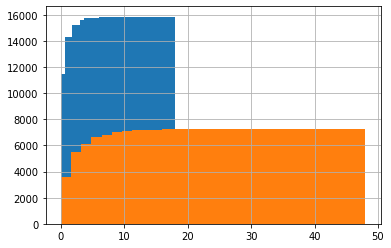

In [220]:
col = 'all_creds_count_lm'
all_histograms(col)
#решение по выдаче кредитов зависит от count_overdue_all_3lm, вероятность выдачи увеличивается с возрастанием значений
#разброс относительно среднего на выборке одобренных кредитов значительно больше чем на выборке отказанных кредитов

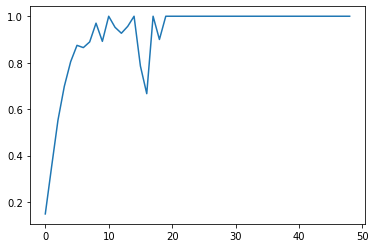

In [217]:
issuance_percentage(col)

In [279]:
df['all_creds_count_lm'].value_counts()

0     13444
1      4393
2      2142
3      1120
4       695
5       447
6       237
7       172
8       134
9        74
10       59
11       42
12       41
13       23
14       20
15       14
17       11
18       10
16        9
19        5
21        4
23        4
22        3
20        3
33        3
26        1
24        1
29        1
27        1
32        1
48        1
38        1
Name: all_creds_count_lm, dtype: int64

In [219]:
df.groupby('all_creds_count_lm').approved.sum()

all_creds_count_lm
0     2003
1     1551
2     1184
3      782
4      559
5      391
6      205
7      153
8      130
9       66
10      59
11      40
12      38
13      22
14      20
15      11
16       6
17      11
18       9
19       5
20       3
21       4
22       3
23       4
24       1
26       1
27       1
29       1
32       1
33       3
38       1
48       1
Name: approved, dtype: int64

Varience for approved is  2.0409885905822276
Varience for not approved is  1.786331216401736


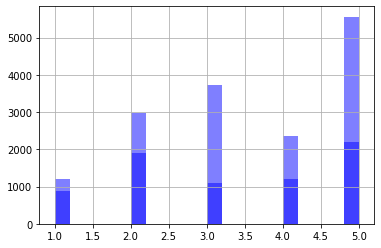

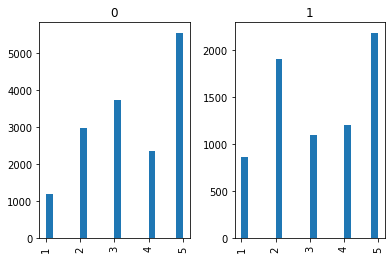

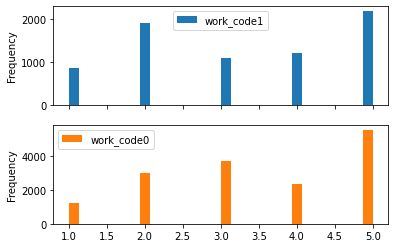

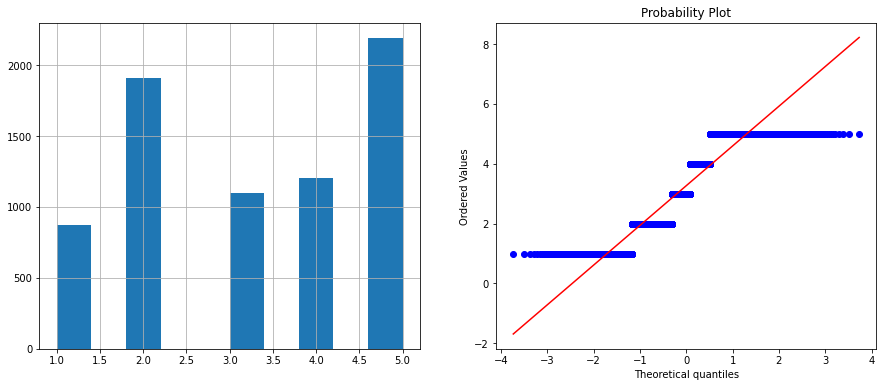

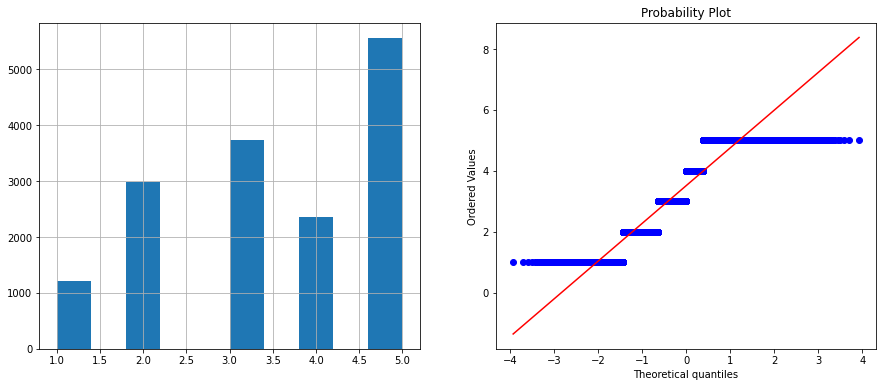

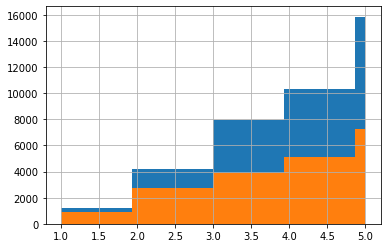

In [225]:
col = 'work_code'
all_histograms(col)
#решение по выдаче кредитов зависит от work_code:
#вероятней всешго выдадут кредит work_code со значением: l, 2. наименьший процент выдачи кредита имеют значения 5, 3
#разброс относительно среднего на выборке одобренных кредитов  больше чем на выборке отказанных кредитов

In [287]:
df.groupby('approved').work_code.unique()

approved
0    [3, 5, 4, 2, 1]
1    [1, 2, 4, 5, 3]
Name: work_code, dtype: object

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


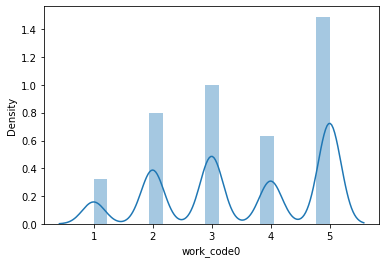

In [224]:
snsplot_0(col)

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


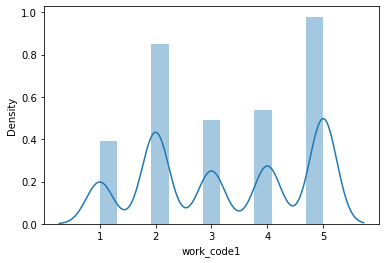

In [226]:
snsplot_1(col)

In [231]:
df.groupby('work_code').approved.sum()

work_code
1     871
2    1905
3    1100
4    1204
5    2189
Name: approved, dtype: int64

In [235]:
df['work_code'].value_counts()

5    7747
2    4881
3    4834
4    3570
1    2084
Name: work_code, dtype: int64

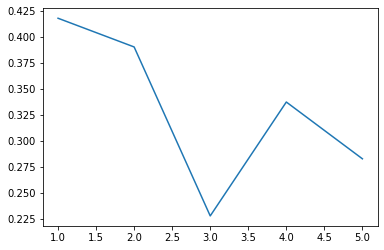

In [232]:
issuance_percentage(col)


approved
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: month_income, dtype: object

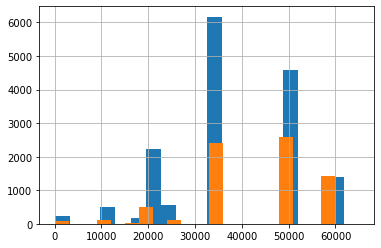

In [237]:
df.groupby('approved').month_income.hist(bins=20)

Varience for approved is  174703158.58699265
Varience for not approved is  190853340.85293928


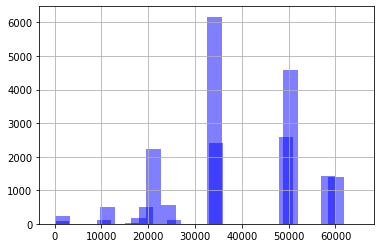

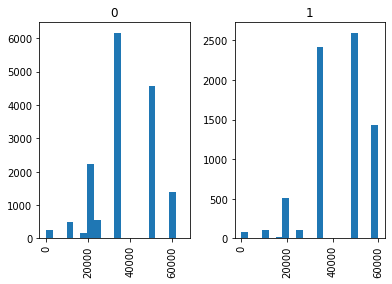

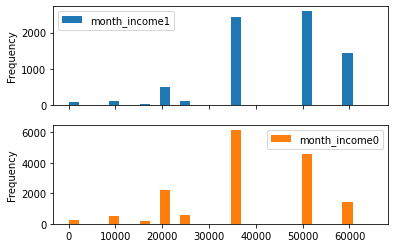

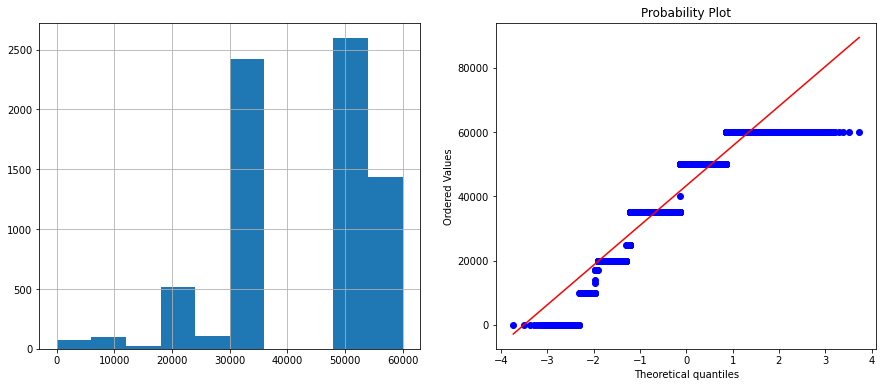

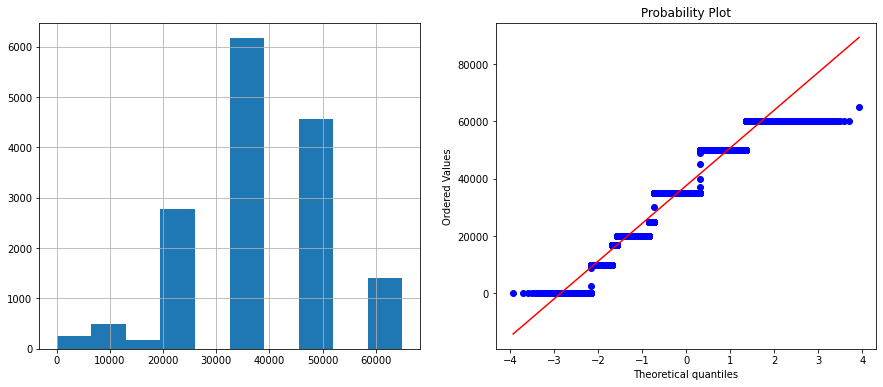

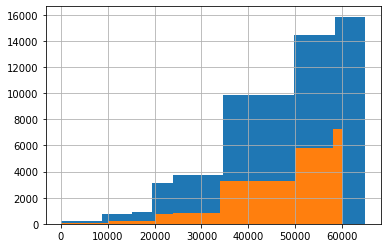

In [314]:
col = 'month_income'
all_histograms(col)
#решение по выдаче кредитов зависит от month_income, вероятность выдачи кредита увеличивается с возрастанием значения

In [282]:
df.month_income.describe()

count    23116.000000
mean     39363.189998
std      13887.644526
min          0.000000
25%      35000.000000
50%      35000.000000
75%      50000.000000
max      65000.000000
Name: month_income, dtype: float64

In [258]:
df['month_income'].value_counts()

35000    8589
50000    7165
60000    2833
20000    2736
25000     666
10000     596
0         320
17000     200
40000       2
9000        1
13000       1
49000       1
14000       1
2500        1
45000       1
65000       1
30000       1
37000       1
Name: month_income, dtype: int64

Snsplot for non approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


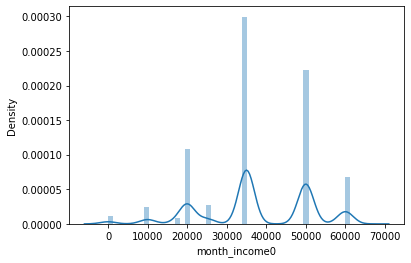

In [315]:
snsplot_0(col)

Snsplot for approved values


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


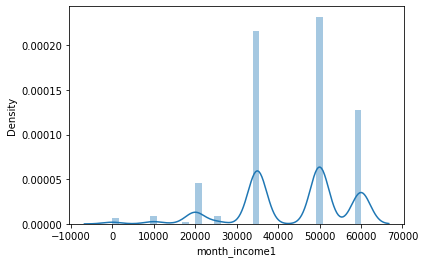

In [241]:
snsplot_1(col)

In [ ]:
#то, что идет дальше, возможно не стоит смотреть. 
#я была занята и не успела нормально добраться до второй части
#если вы посмотрели первую часть и есть вероятность, что я вам подхожу, то я могла бы доделать это задание.
#(присылаю, так как условились, что на задание дается 2 недели)


In [7]:
data = df.drop(columns = ['bad'],axis = 1)
data

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.00,...,529,0.0,0,0.00,0,0,3,50000,46,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,...,0,0.0,0,0.00,0,0,3,35000,17,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,...,0,0.0,0,0.00,0,2,3,35000,58,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,...,0,0.0,0,4923.97,0,0,5,35000,4,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.00,...,0,0.0,0,0.00,0,0,5,35000,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0.0,0,0,3,0.0,0,733,0.0,0.00,...,0,0.0,0,0.00,0,0,3,35000,60,0
23112,6697212,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,...,998,9500.0,5,0.00,1,0,5,20000,7,0
23113,6697215,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,...,394,0.0,0,0.00,0,0,4,35000,94,0
23114,6697264,0.0,3,52080,0,7000.0,18132,15,0.0,5783.65,...,505,0.0,13,0.00,0,1,3,35000,46,0


In [8]:
X = data.loc[:, data.columns != "approved"].values
y = data.loc[:, data.columns == "approved"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
print(f"Original data shapes: {X_train.shape, X_test.shape}")

Original data shapes: ((18492, 23), (4624, 23))


In [31]:
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imb_make_pipeline

In [21]:
rf_clf = RandomForestClassifier(n_estimators=500,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")
pip_orig = make_pipeline(SimpleImputer(strategy="mean"),
                         RobustScaler(),
                         rf_clf)
# Build model with no sampling
scores = cross_val_score(pip_orig,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Original model's average AUC: {scores.mean():.3f}")

Original model's average AUC: 0.961


In [32]:
# Build model with undersampling
pip_undersample = imb_make_pipeline(SimpleImputer(strategy="mean"),
                                    RobustScaler(),
                                    RandomUnderSampler(),
                                    rf_clf)
scores = cross_val_score(pip_undersample,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Under-sampled model's average AUC: {scores.mean():.3f}")

# Build model with oversampling
pip_oversample = imb_make_pipeline(SimpleImputer(strategy="mean"),
                                   RobustScaler(),
                                   RandomOverSampler(),
                                   rf_clf)
scores = cross_val_score(pip_oversample,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Over-sampled model's average AUC: {scores.mean():.3f}")

# Build model with EasyEnsemble
resampled_rf = BalancedBaggingClassifier(base_estimator=rf_clf,
                                         n_estimators=10,
                                         random_state=123)
pip_resampled = make_pipeline(Imputer(strategy="mean"),
                              RobustScaler(),
                              resampled_rf)
scores = cross_val_score(pip_resampled,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"EasyEnsemble model's average AUC: {scores.mean():.3f}")

# Build model with SMOTE
pip_smote = imb_make_pipeline(SimpleImputer(strategy="mean"),
                              RobustScaler(),
                              SMOTE(),
                              rf_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"SMOTE model's average AUC: {scores.mean():.3f}")

TypeError: __init__() takes 2 positional arguments but 5 were given